<a href="https://colab.research.google.com/github/MathalinAK/machinelearning/blob/main/mltask1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler




In [64]:
cols=["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df = pd.read_csv("magic04.data", names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [65]:
(df["class"].value_counts())

class
g    12332
h     6688
Name: count, dtype: int64

In [66]:
df["class"] = df["class"].apply(str)


In [67]:
df["class"] = df["class"].apply(str)  # Convert all values to strings


In [68]:
df["class"]=(df["class"] == "g").astype(int)


In [69]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

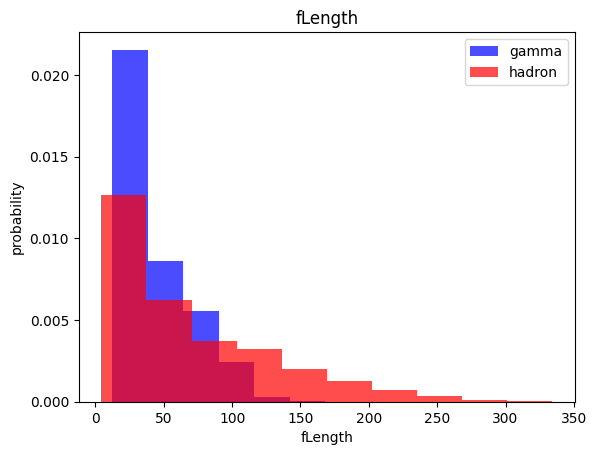

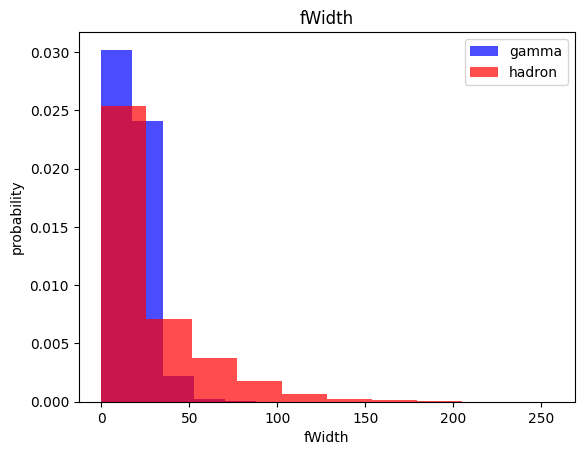

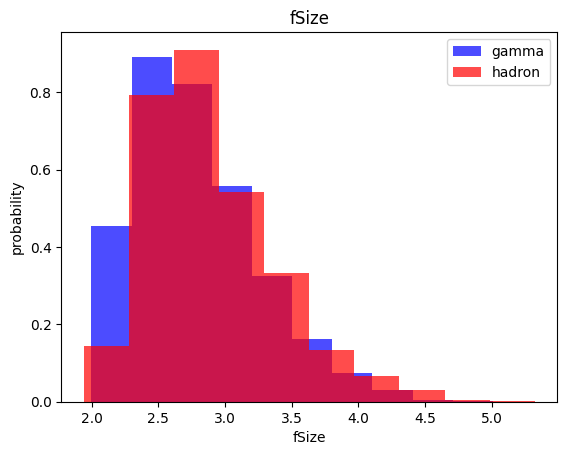

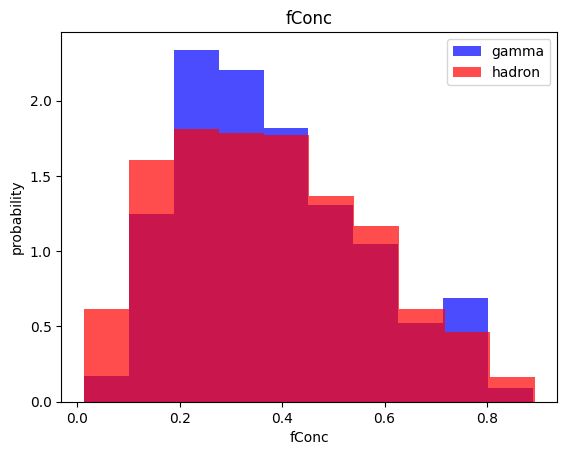

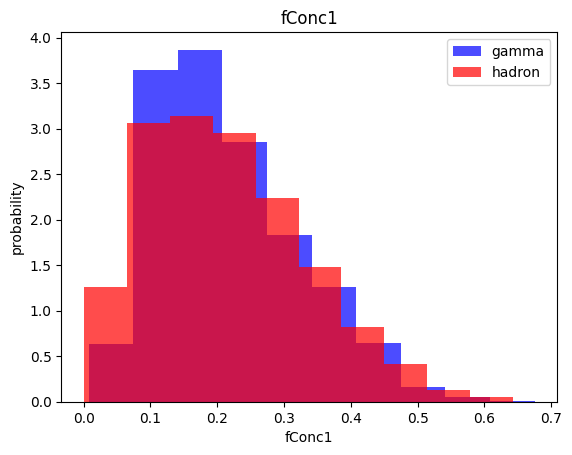

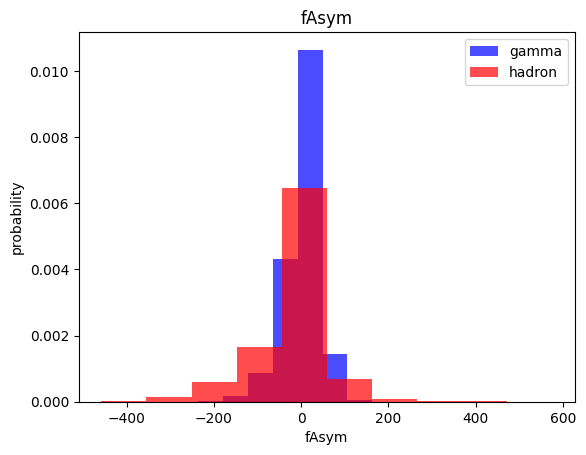

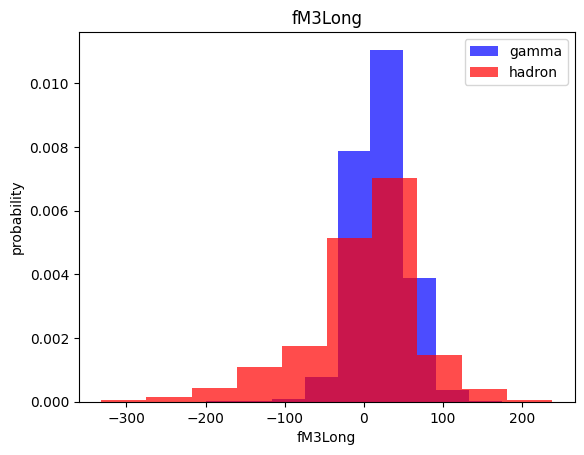

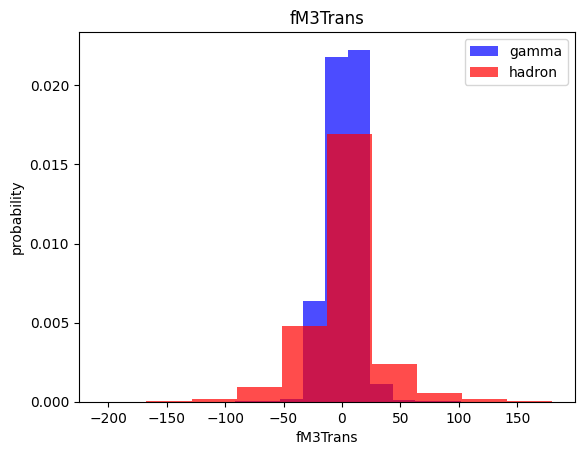

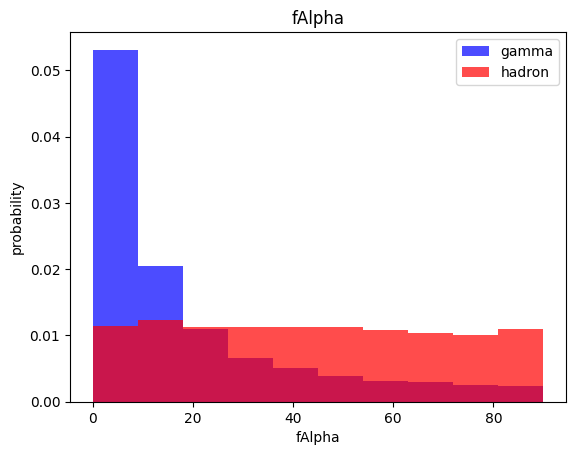

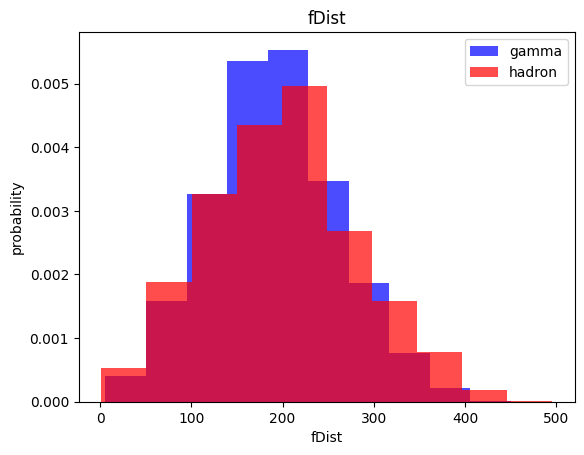

In [70]:
for label in cols[:-1]:
  plt.hist(df[df["class"] == 1][label],color='blue',label='gamma',alpha=0.7,density=True)
  plt.hist(df[df["class"] == 0][label],color='red',label='hadron',alpha=0.7,density=True)
  plt.title(label)
  plt.ylabel("probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [71]:
 train, valid, test=np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [72]:
def scale_dataset(dataframe, oversample=False):
  x=dataframe[dataframe.columns[:-1]].values
  y=dataframe[dataframe.columns[-1]].values
  scaler=StandardScaler()
  x=scaler.fit_transform(x)
  data=np.hstack((x,np.reshape(y,(-1,1))))
  return data,x,y




In [73]:
train

fLength   fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
10583  94.4692  30.4196  2.9085  0.2136  0.1265 -124.0420  79.9422  -19.1378   
14738  10.2416   7.8730  2.5269  0.7708  0.4725   15.5733   3.8460   -8.5849   
6599   39.5411  10.8616  2.8636  0.4134  0.2129    9.5346  33.4458   -3.4861   
5541   45.3582  28.0417  2.7997  0.2331  0.1261   31.2749  25.3396    9.4496   
11821  26.5330  21.2504  2.6950  0.2967  0.1625   24.1742  17.2021    9.4670   
...        ...      ...     ...     ...     ...       ...      ...       ...   
15295  70.2697  17.3377  3.0497  0.2599  0.1748   19.7213  23.8731  -16.4564   
6271   18.0731  11.5841  2.4125  0.5803  0.4313   -0.5062   6.9524  -11.5926   
2276   45.4644  28.6620  2.9724  0.2962  0.1625   55.9499  26.4065   24.0769   
8640   29.9508  15.4549  2.6405  0.3547  0.1888    4.5319  15.1616    7.4995   
6779   24.1500  10.9063  2.4141  0.4971  0.2563    3.3226  20.4622    6.5977   

        fAlpha     fDist  class  
10583  10.5067  218.8340      1  
14738  48.9221  265.2659      0  
6599    4.4190  192.5890      1  
5541   41.4223  252.4180      1  
11821  39.3249  192.6870      1  
...        ...       ...    ...  
15295  36.7882  136.4736      0  
6271    9.6089  256.9110      1  
2276    4.5248  266.2230      1  
8640   23.9617  133.0960      1  
6779   14.3860  179.2520      1  

[11412 rows x 11 columns]

In [74]:
train,x_train,y_train =scale_dataset(train,oversample=True)
valid,x_valid,y_valid =scale_dataset(valid,oversample=False)
test,x_test,y_test =scale_dataset(test,oversample=False)

In [75]:
print(train.shape)
print(valid.shape)

(11412, 11)
(3804, 11)


KNN(k-nearest neighbor algorithm)

In [76]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [77]:
y_pred=knn_model.predict(x_test)
y_pred

array([1, 0, 1, ..., 0, 1, 1])

In [78]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.70      0.74      1350
           1       0.84      0.90      0.87      2454

    accuracy                           0.83      3804
   macro avg       0.82      0.80      0.80      3804
weighted avg       0.82      0.83      0.82      3804



naive bayes


In [79]:
from sklearn.naive_bayes import GaussianNB
nb_model=GaussianNB()
nb_model=nb_model.fit(x_train,y_train)

In [80]:
y_pred=nb_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.36      0.47      1350
           1       0.72      0.91      0.80      2454

    accuracy                           0.71      3804
   macro avg       0.70      0.63      0.64      3804
weighted avg       0.71      0.71      0.69      3804



logistic regression

In [81]:
from sklearn.linear_model import LogisticRegression
lg_model=LogisticRegression()
lg_model=lg_model.fit(x_train,y_train)

In [82]:
y_pred=lg_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.60      0.68      1350
           1       0.80      0.91      0.86      2454

    accuracy                           0.80      3804
   macro avg       0.80      0.75      0.77      3804
weighted avg       0.80      0.80      0.79      3804



support vector machine

In [83]:
from sklearn.svm import SVC
svm_model=SVC()
svm_model=svm_model.fit(x_train,y_train)
y_pred=svm_model.predict(x_test)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1350
           1       0.86      0.96      0.91      2454

    accuracy                           0.88      3804
   macro avg       0.89      0.84      0.86      3804
weighted avg       0.88      0.88      0.87      3804



tensorflow


In [101]:
import tensorflow as tf


In [103]:
#plotting the loss
def plot_loss(history):
    plt.plot(history.history['loss'],label='loss')
    plt.plot(history.history['val_loss'],label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Binary crossentropy')
    plt.legend()
    plt.grid(True)
    plt.show()
#plotting the accuracy
def plot_accuracy(history):
    plt.plot(history.history['accuracy'],label='accuracy')
    plt.plot(history.history['val_accuracy'],label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

In [104]:

nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(x_train.shape[1],)),  # Use the correct input shape
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

In [106]:
# Compile the Model
nn_model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)



In [107]:
def plot_history(history):
  fig, (ax1,ax2)=plt.subplots(1,2,figsize=(10,8))
  ax1.plot(history.history['loss'],label='loss')
  ax1.plot(history.history['val_loss'],label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)
  ax2.plot(history.history['accuracy'],label='accuracy')
  ax2.plot(history.history['val_accuracy'],label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel ('Accuracy')
  ax2.grid(True)
  plt.show()



    # x_train, y_train,
    # epochs=100,#Train for 100 epochs
    # batch_size=32,#Process 32 samples per batch
    # validation_split=0.2,#Use 20% of the data for validation
    # verbose=0#Display training progress

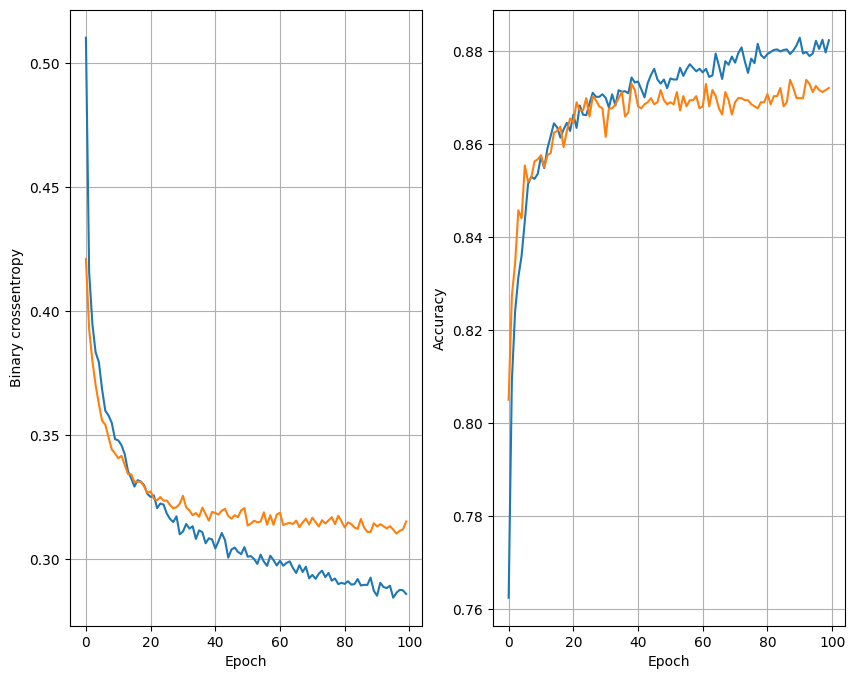

In [108]:
plot_history(history)

In [110]:
def train_model(x_train,y_train,num_nodes,dropout_prob,lr,batch_size,epochs):
  nn_model=tf.keras.Sequential([
  tf.keras.layers.Dense(num_nodes,activation='relu',input_shape=(10,)),
  tf.keras.layers.Dropout(dropout_prob),
  tf.keras.layers.Dense(num_nodes,activation='relu'),
  tf.keras.layers.Dropout(dropout_prob),
  tf.keras.layers.Dense(1,activation='sigmoid')
  ])
  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr),loss='binary_crossentropy',metrics=['accuracy'])
  history=nn_model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_split=0.2,verbose=0)
  return nn_model,history




16 nodes, dropout 0, lr 0.01, batch size 32


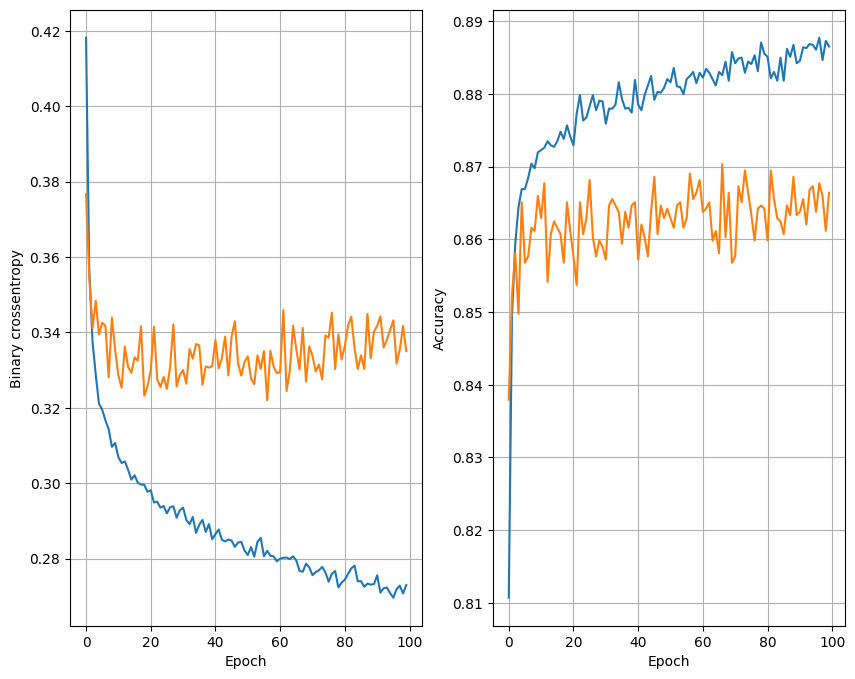

Validation Loss: 0.3320881128311157
Updated least loss model.
16 nodes, dropout 0, lr 0.01, batch size 64


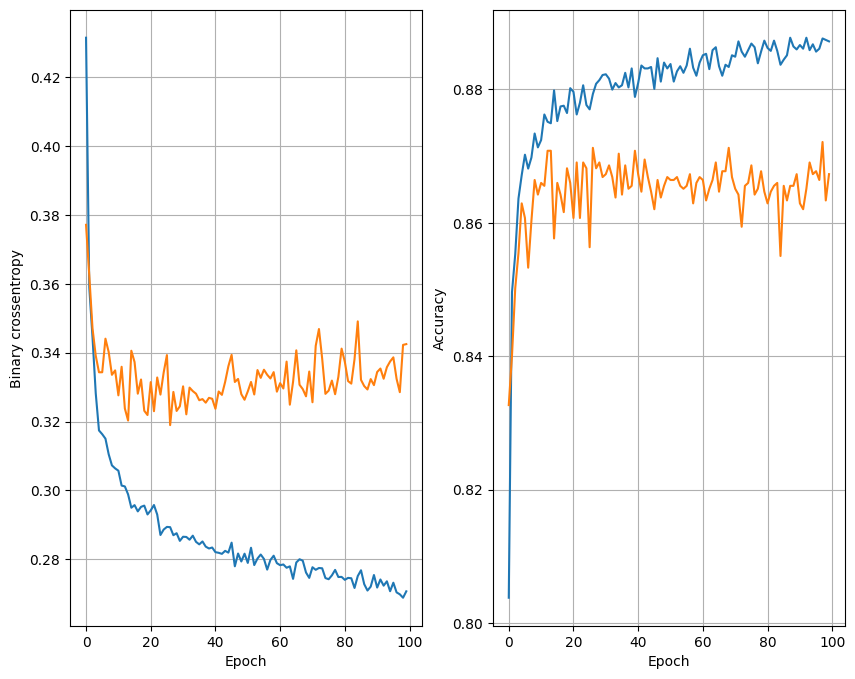

Validation Loss: 0.34212788939476013
16 nodes, dropout 0, lr 0.01, batch size 128


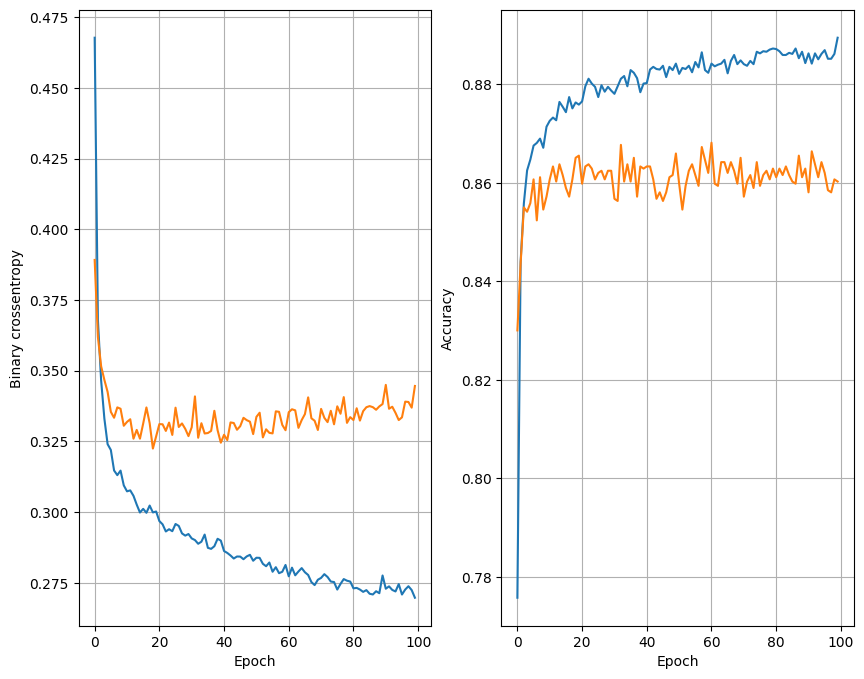

Validation Loss: 0.3327702283859253
16 nodes, dropout 0, lr 0.005, batch size 32


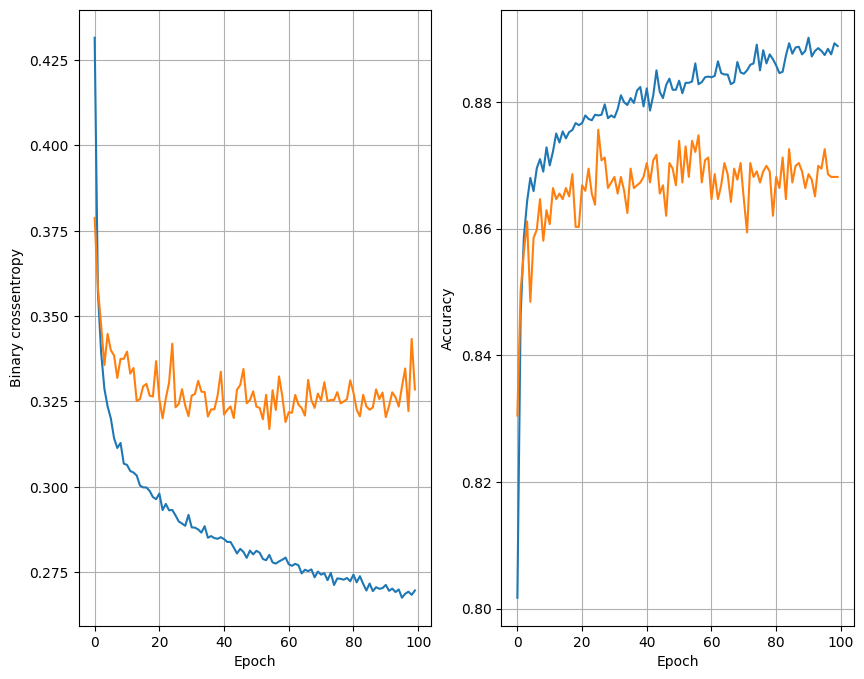

Validation Loss: 0.32889431715011597
Updated least loss model.
16 nodes, dropout 0, lr 0.005, batch size 64


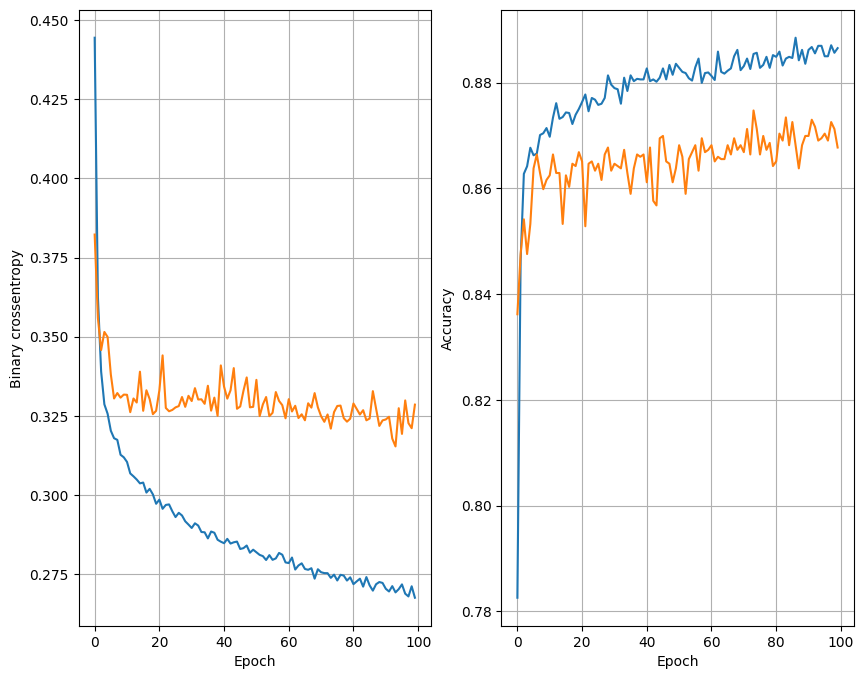

Validation Loss: 0.32506147027015686
Updated least loss model.
16 nodes, dropout 0, lr 0.005, batch size 128


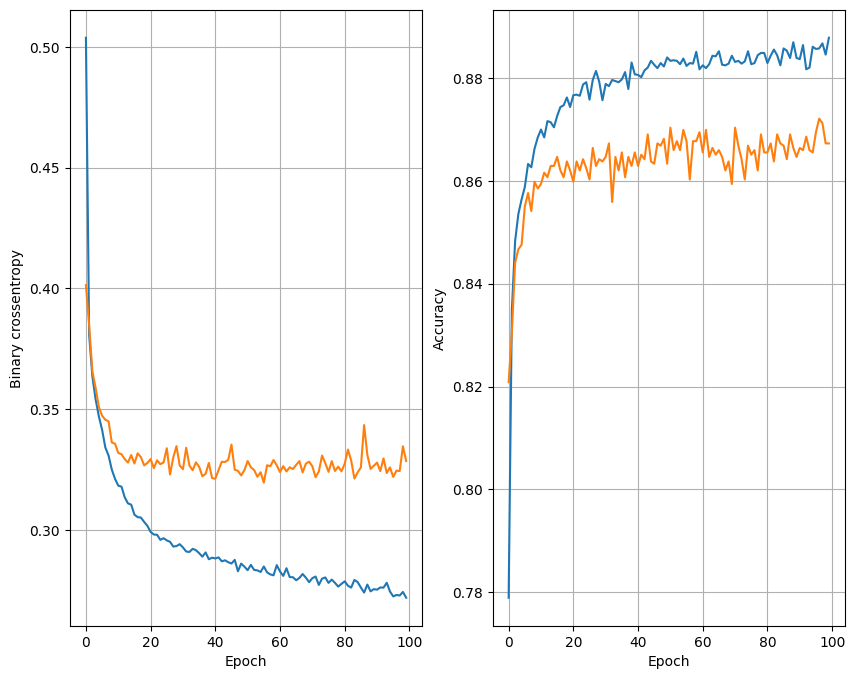

Validation Loss: 0.32565125823020935
16 nodes, dropout 0, lr 0.001, batch size 32


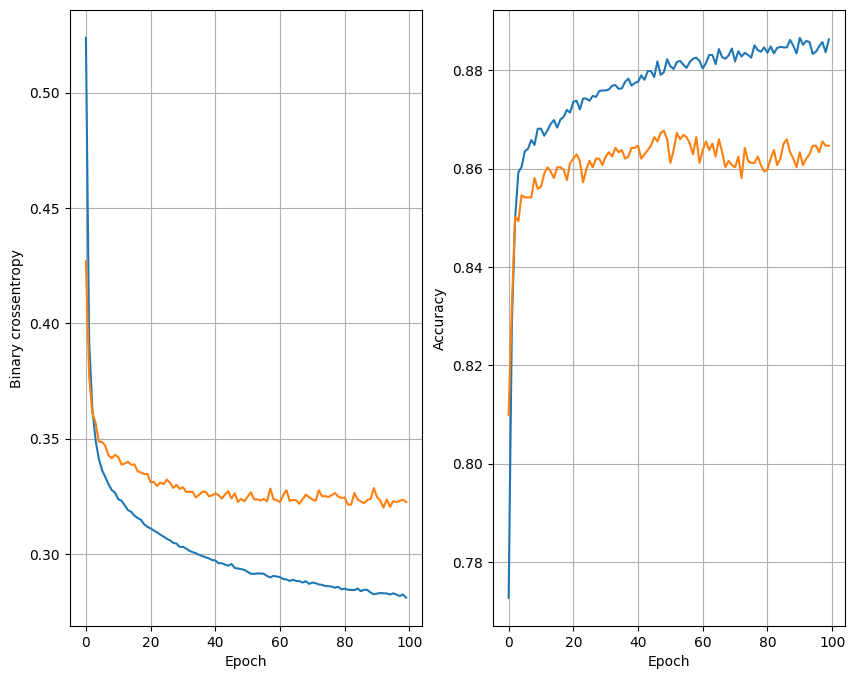

Validation Loss: 0.322166383266449
Updated least loss model.
16 nodes, dropout 0, lr 0.001, batch size 64


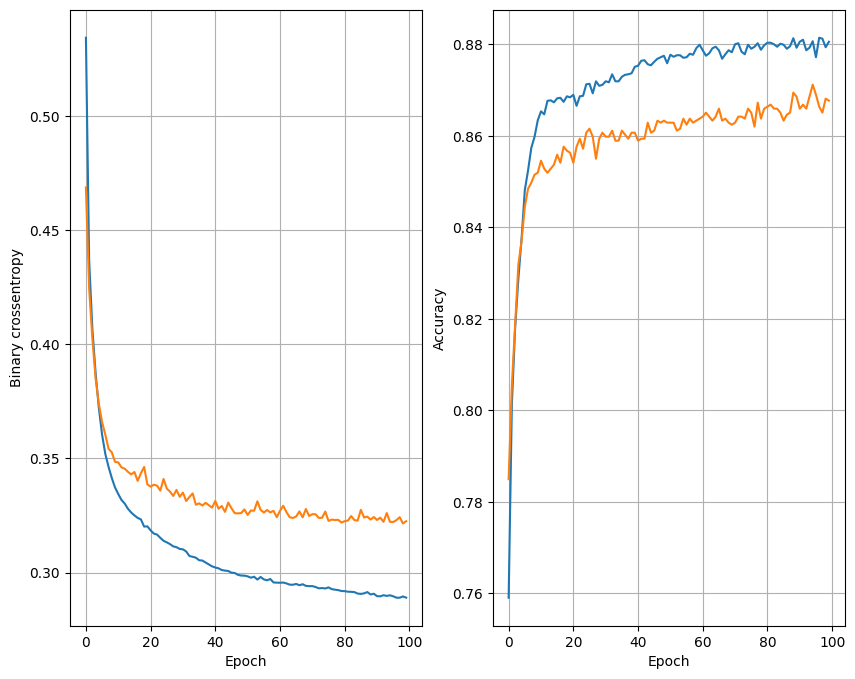

Validation Loss: 0.3253816068172455
16 nodes, dropout 0, lr 0.001, batch size 128


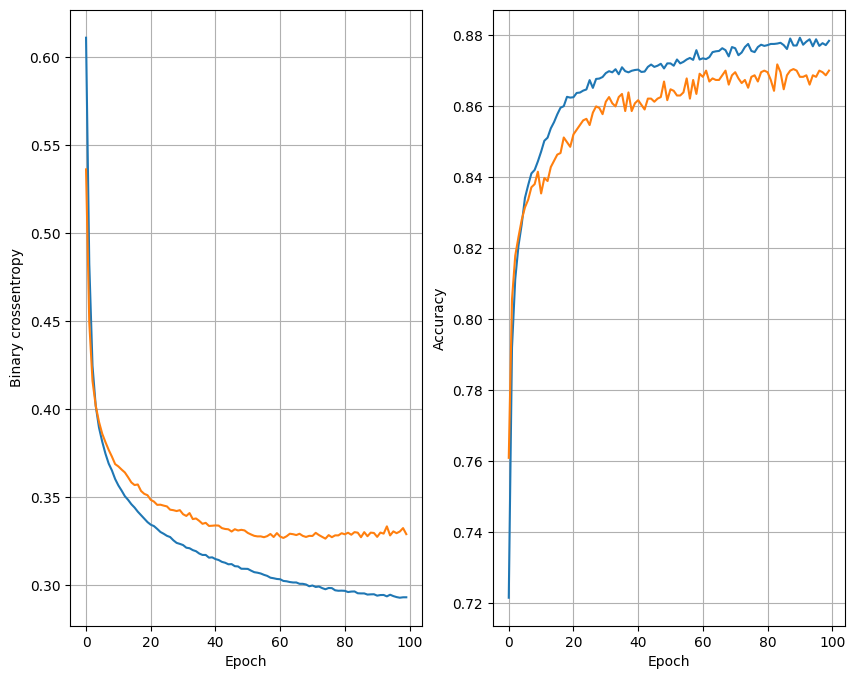

Validation Loss: 0.32591086626052856
16 nodes, dropout 0.2, lr 0.01, batch size 32


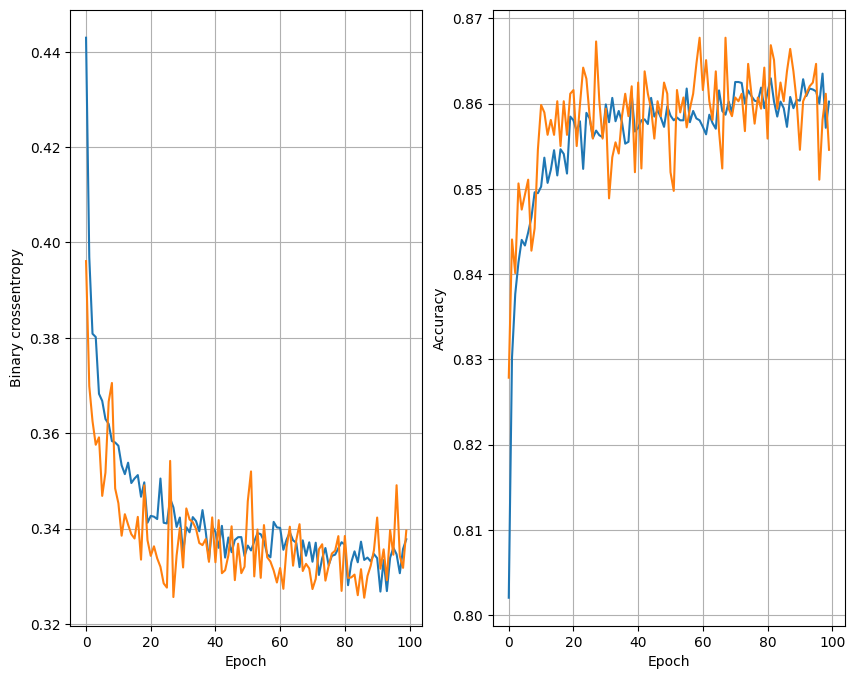

Validation Loss: 0.343203067779541
16 nodes, dropout 0.2, lr 0.01, batch size 64


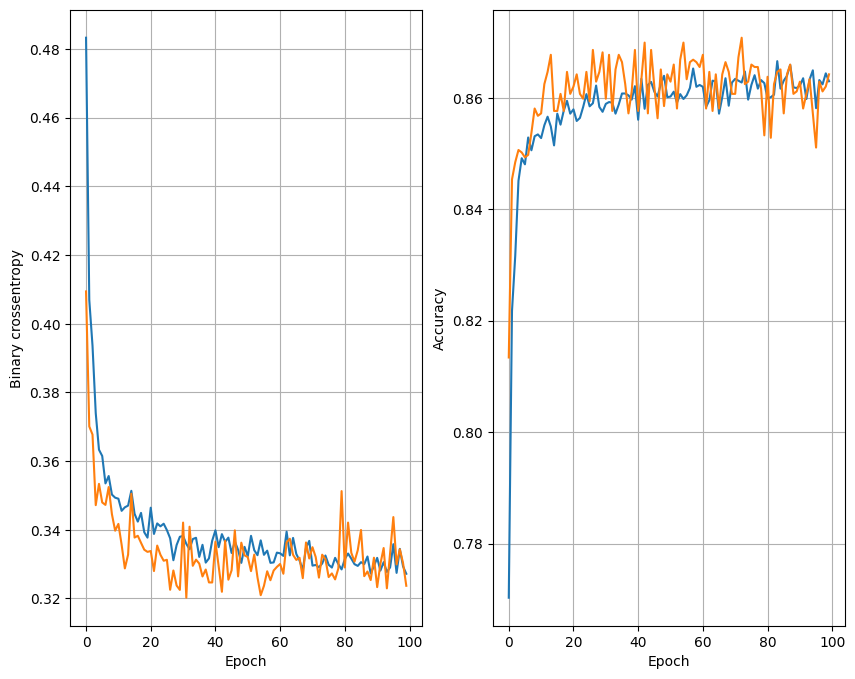

Validation Loss: 0.32857030630111694
16 nodes, dropout 0.2, lr 0.01, batch size 128


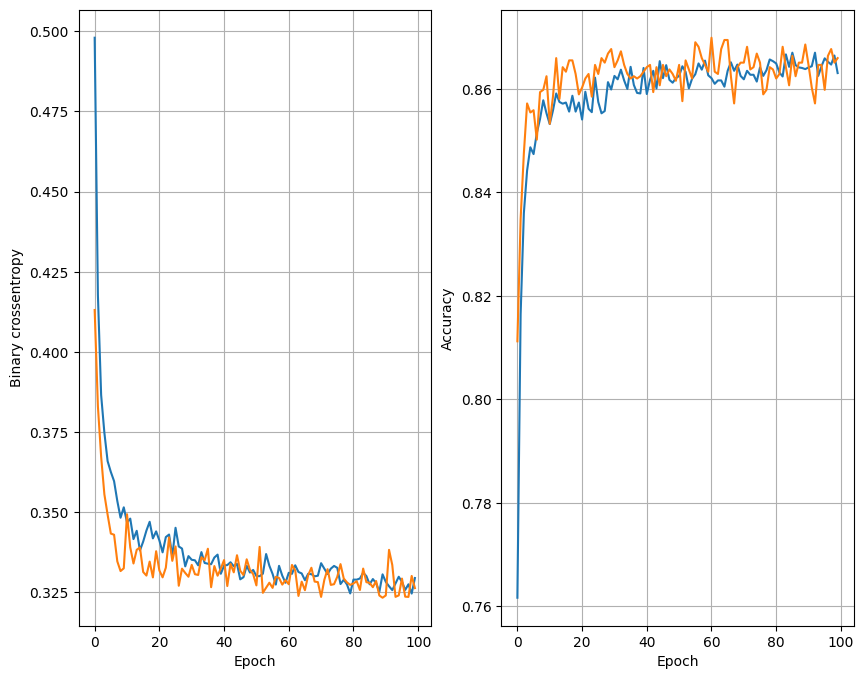

Validation Loss: 0.32847413420677185
16 nodes, dropout 0.2, lr 0.005, batch size 32


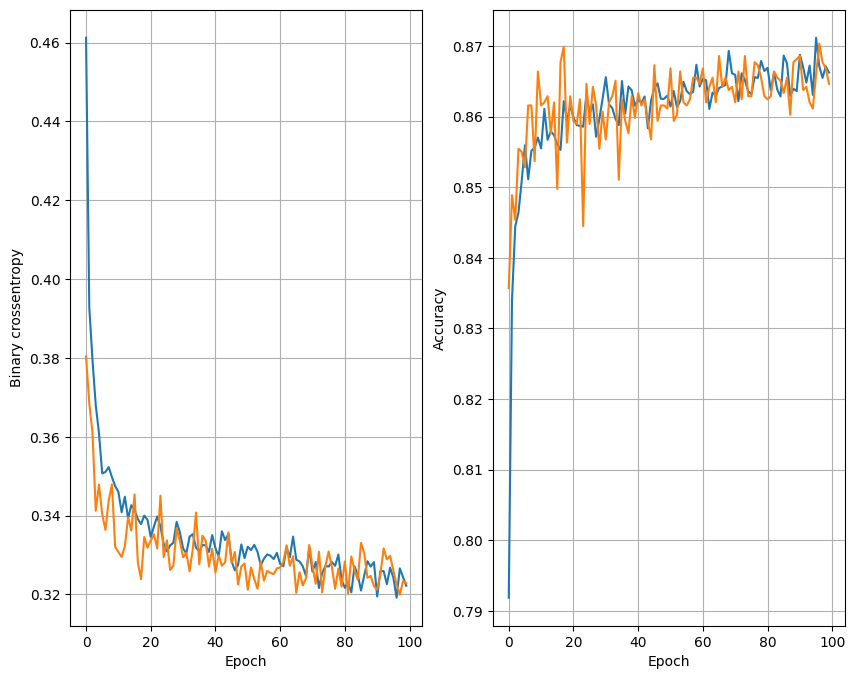

Validation Loss: 0.3220752477645874
Updated least loss model.
16 nodes, dropout 0.2, lr 0.005, batch size 64


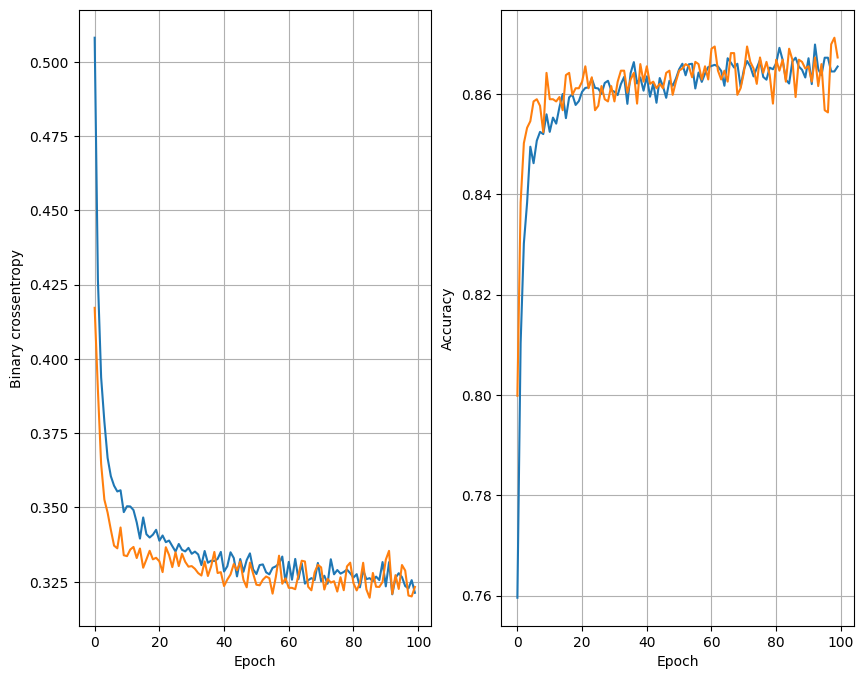

Validation Loss: 0.32905763387680054
16 nodes, dropout 0.2, lr 0.005, batch size 128


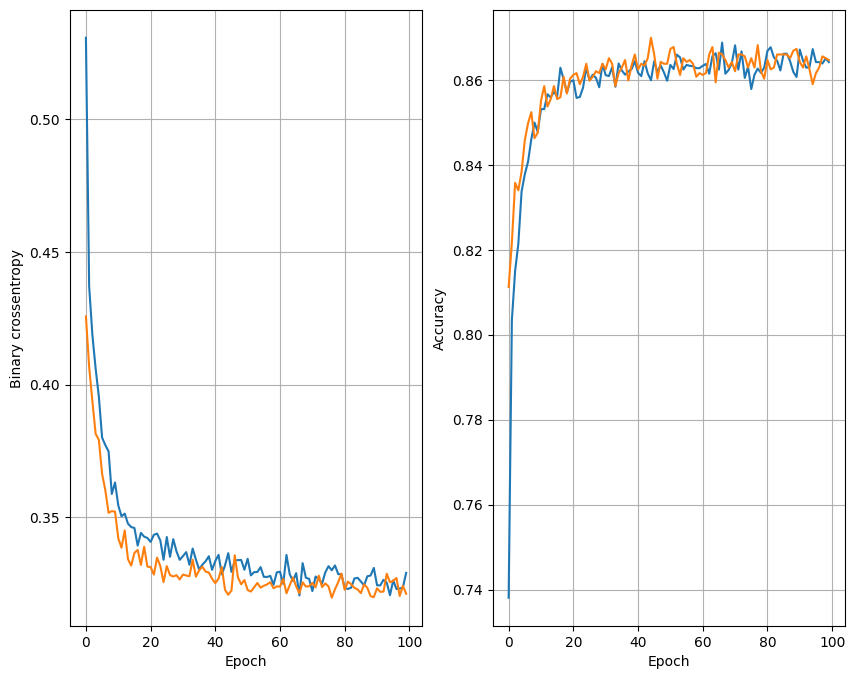

Validation Loss: 0.327948659658432
16 nodes, dropout 0.2, lr 0.001, batch size 32


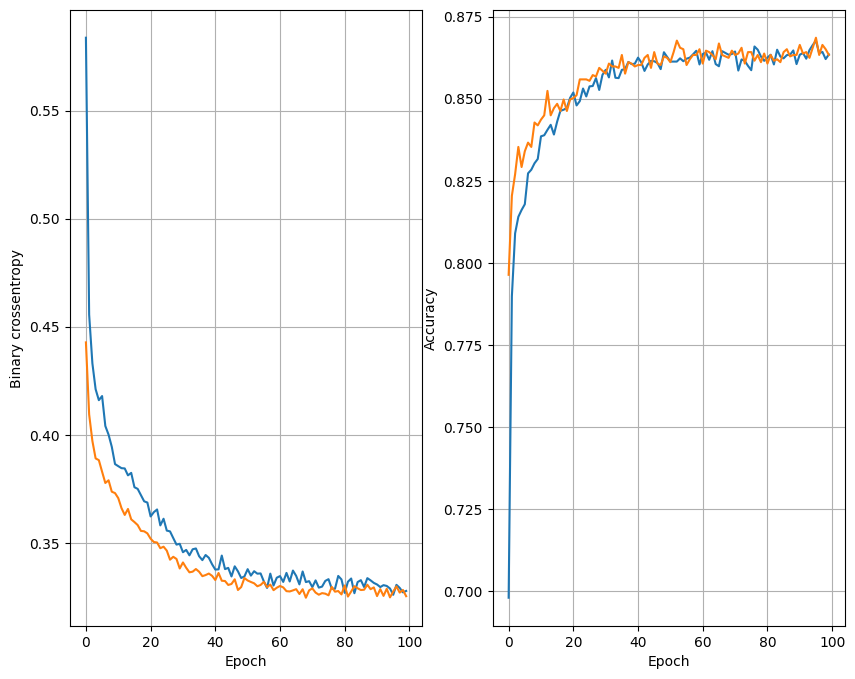

Validation Loss: 0.3329460620880127
16 nodes, dropout 0.2, lr 0.001, batch size 64


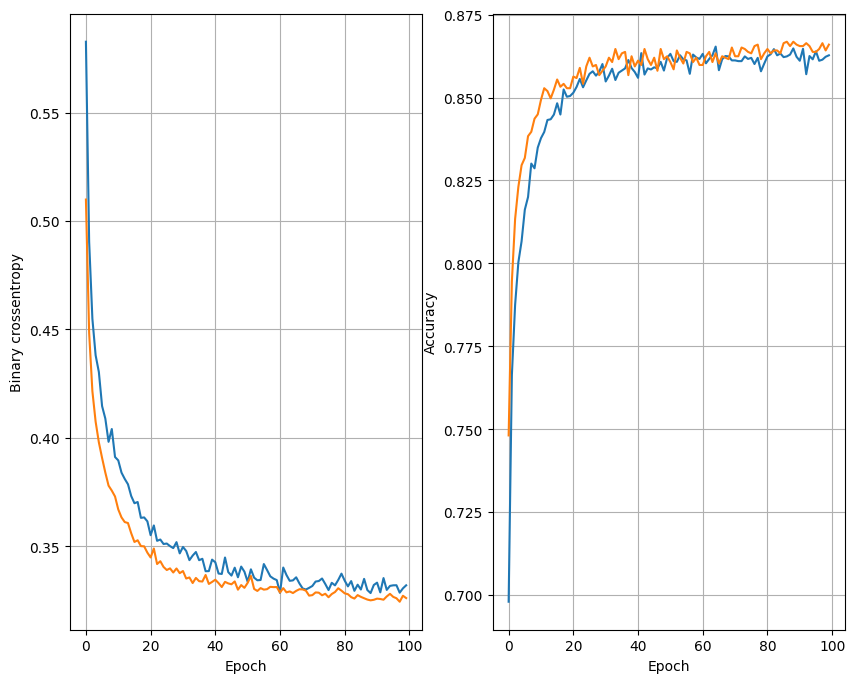

Validation Loss: 0.32598382234573364
16 nodes, dropout 0.2, lr 0.001, batch size 128


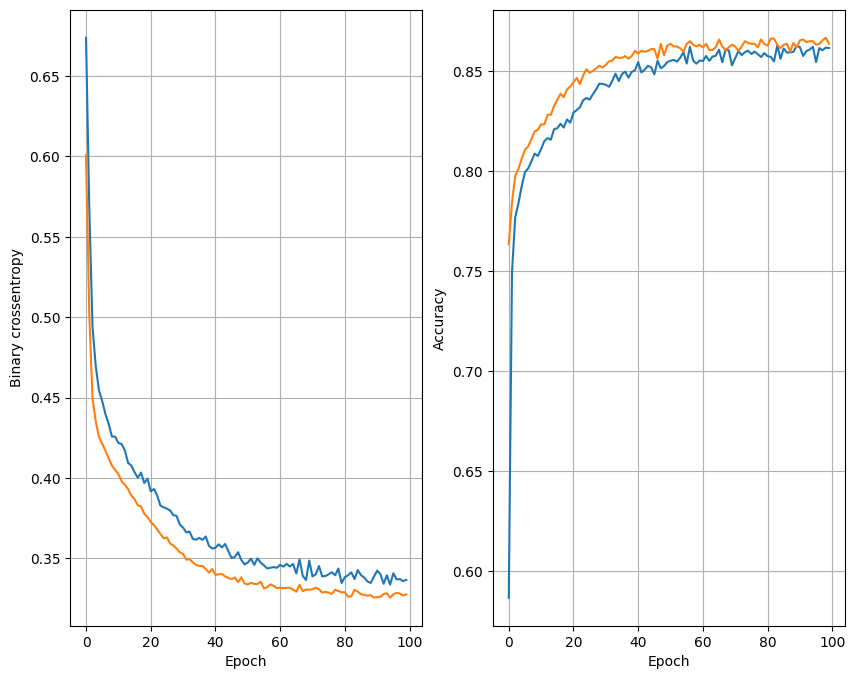

Validation Loss: 0.331757515668869
32 nodes, dropout 0, lr 0.01, batch size 32


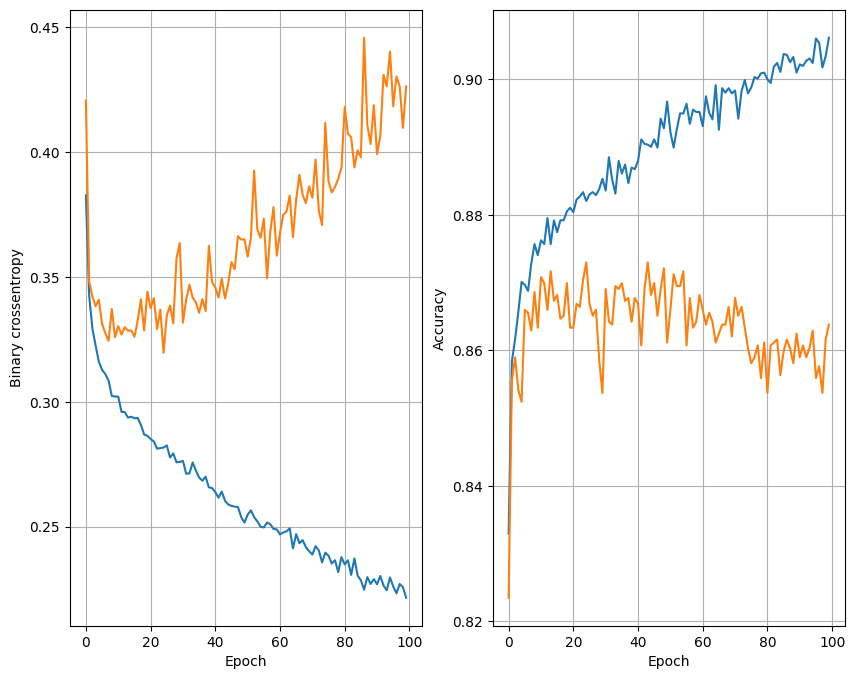

Validation Loss: 0.41148847341537476
32 nodes, dropout 0, lr 0.01, batch size 64


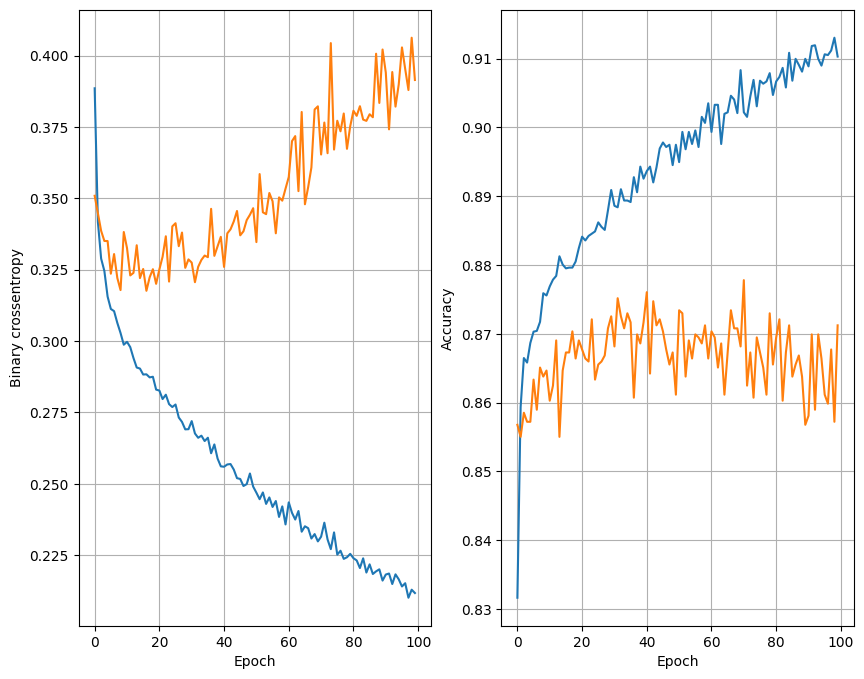

Validation Loss: 0.39387184381484985
32 nodes, dropout 0, lr 0.01, batch size 128


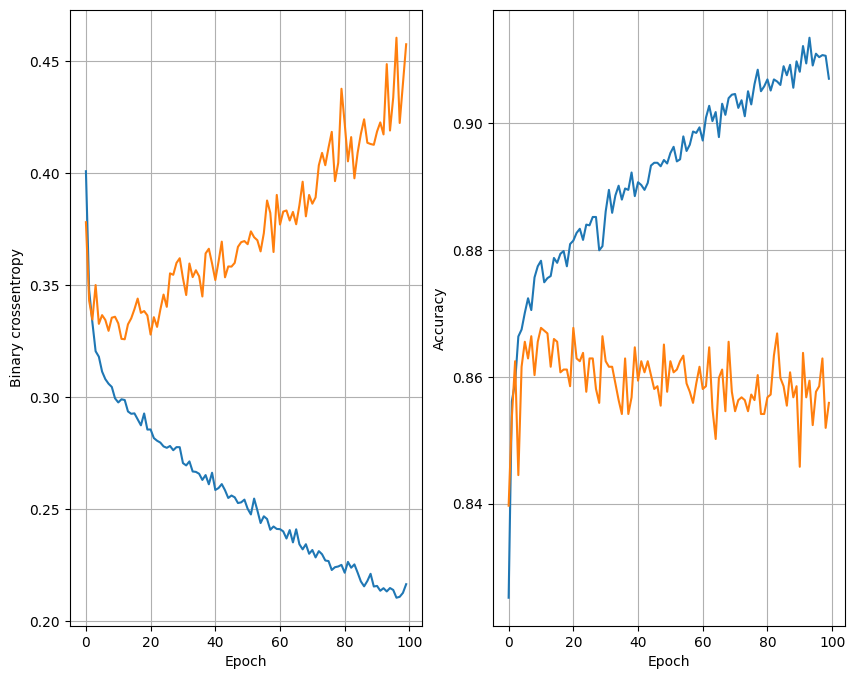

Validation Loss: 0.42113855481147766
32 nodes, dropout 0, lr 0.005, batch size 32


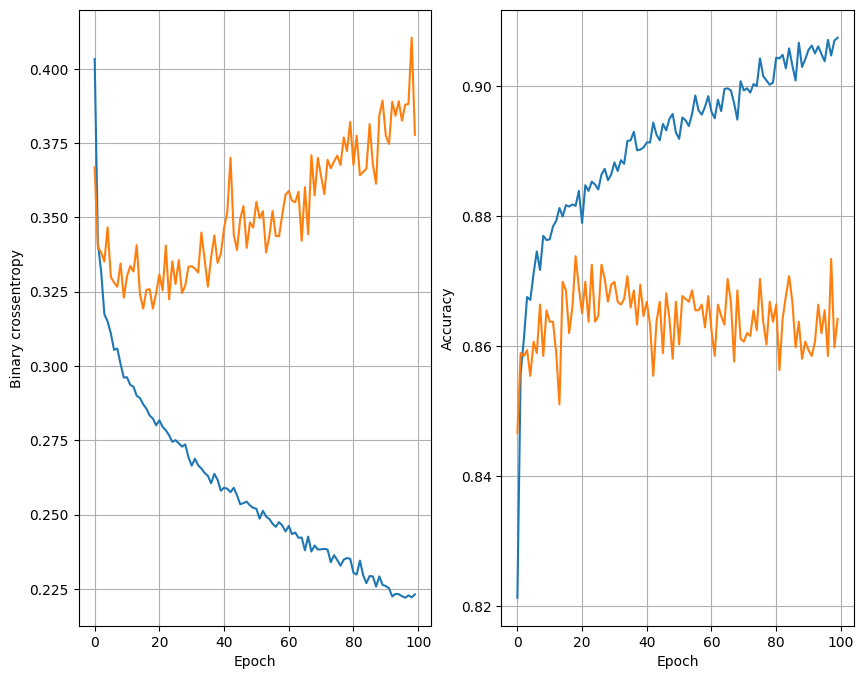

Validation Loss: 0.3972298204898834
32 nodes, dropout 0, lr 0.005, batch size 64


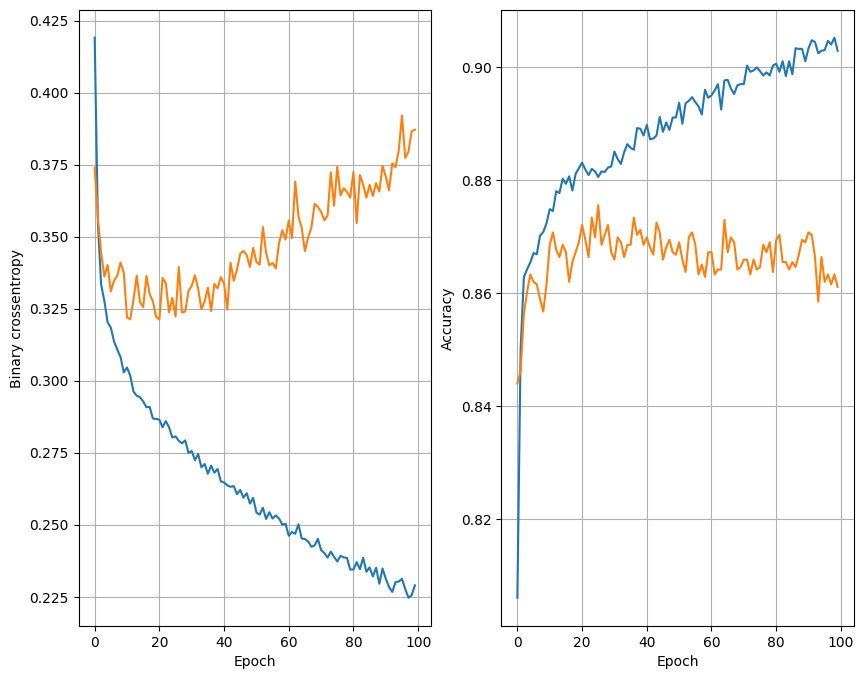

Validation Loss: 0.38719362020492554
32 nodes, dropout 0, lr 0.005, batch size 128


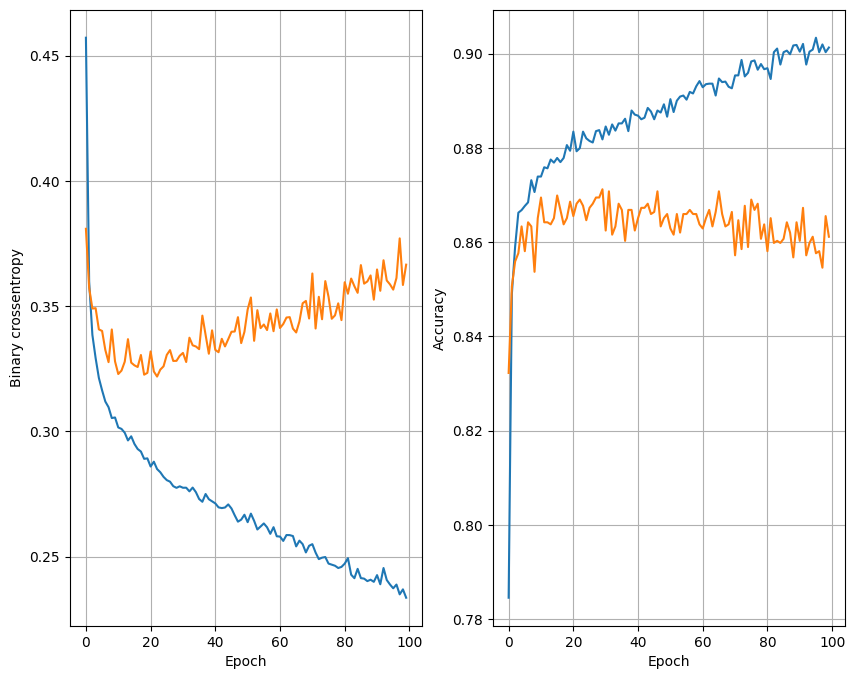

Validation Loss: 0.35591503977775574
32 nodes, dropout 0, lr 0.001, batch size 32


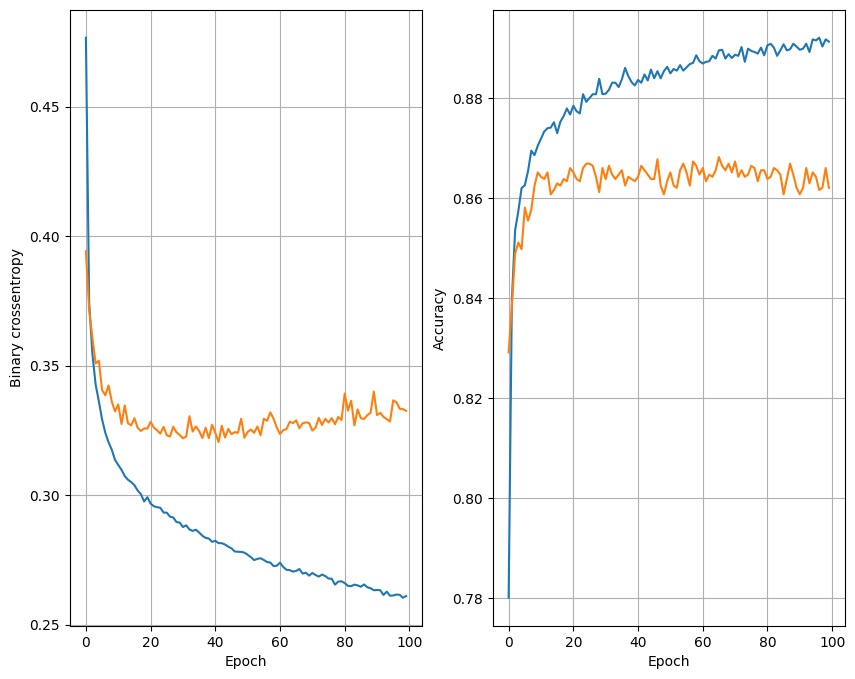

Validation Loss: 0.3338698744773865
32 nodes, dropout 0, lr 0.001, batch size 64


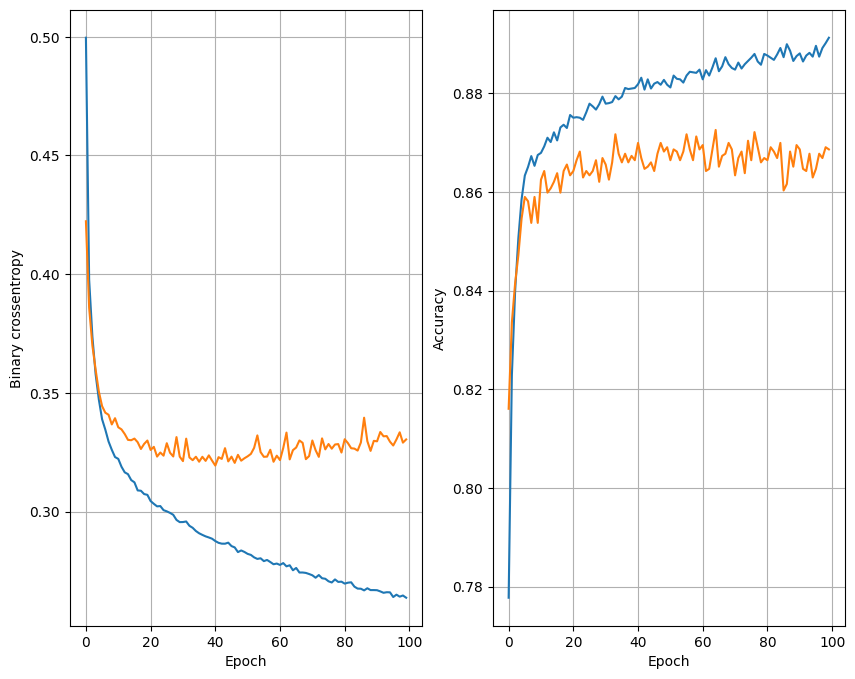

Validation Loss: 0.3213651180267334
Updated least loss model.
32 nodes, dropout 0, lr 0.001, batch size 128


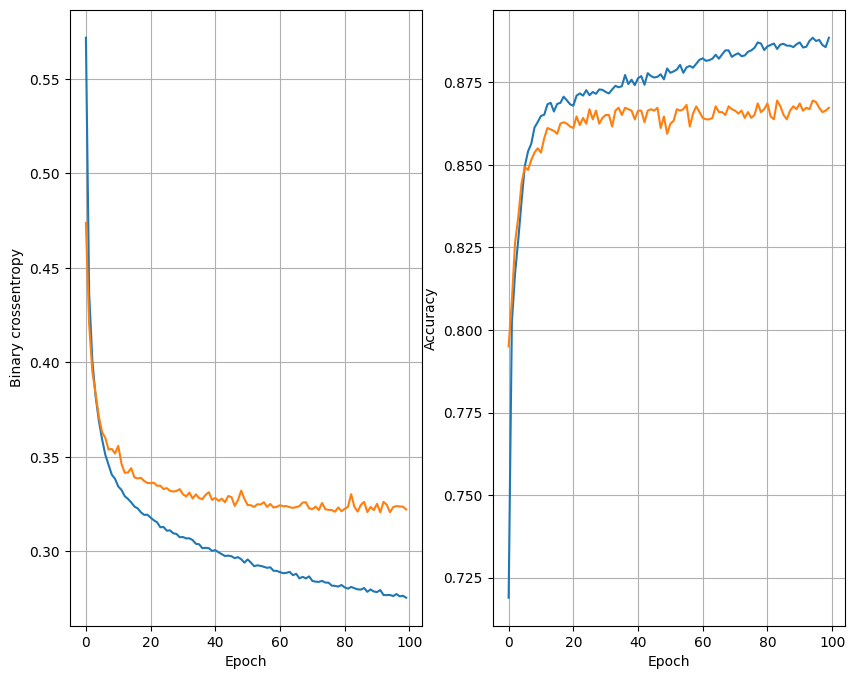

Validation Loss: 0.3213157057762146
Updated least loss model.
32 nodes, dropout 0.2, lr 0.01, batch size 32


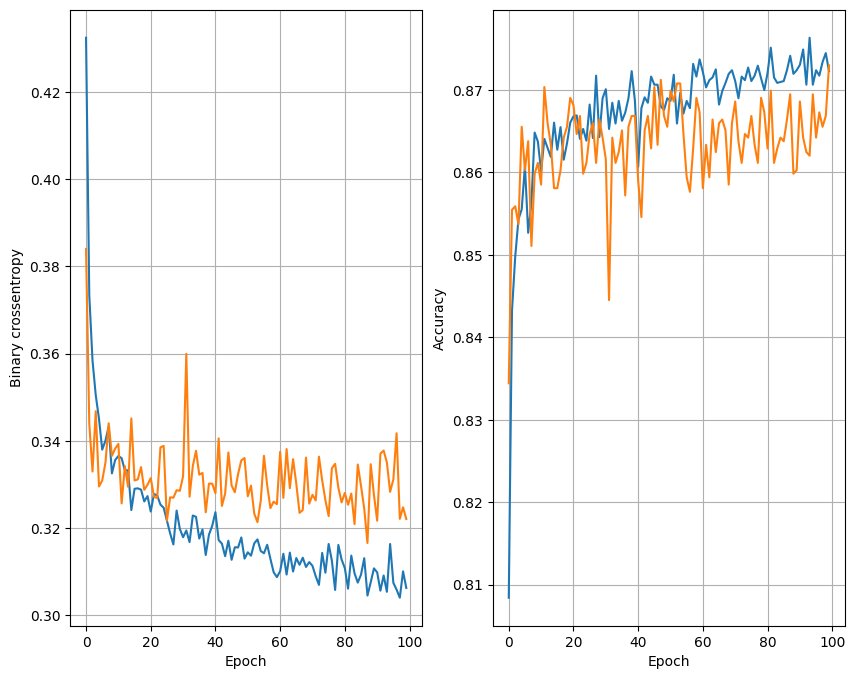

Validation Loss: 0.32102736830711365
Updated least loss model.
32 nodes, dropout 0.2, lr 0.01, batch size 64


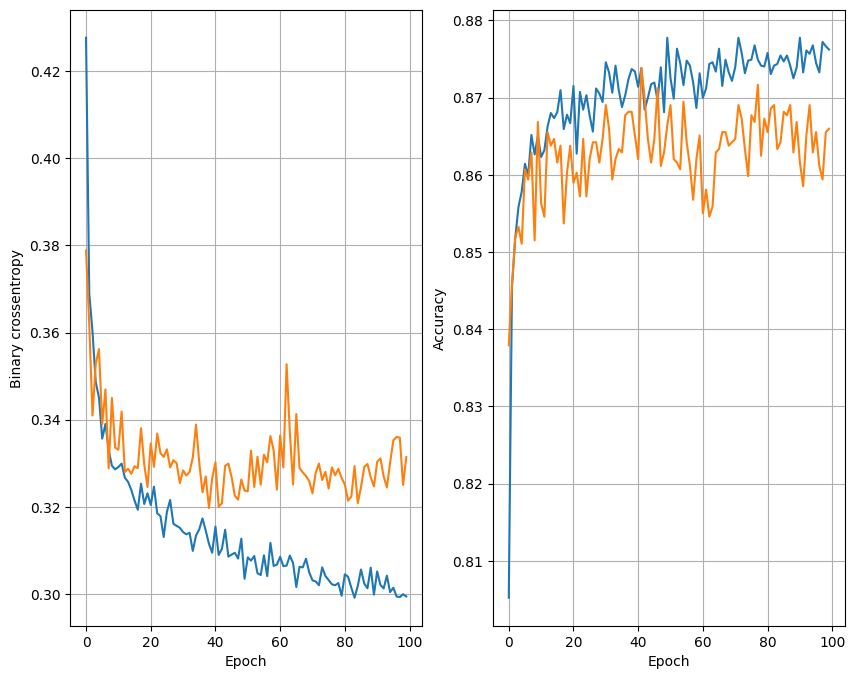

Validation Loss: 0.3290485441684723
32 nodes, dropout 0.2, lr 0.01, batch size 128


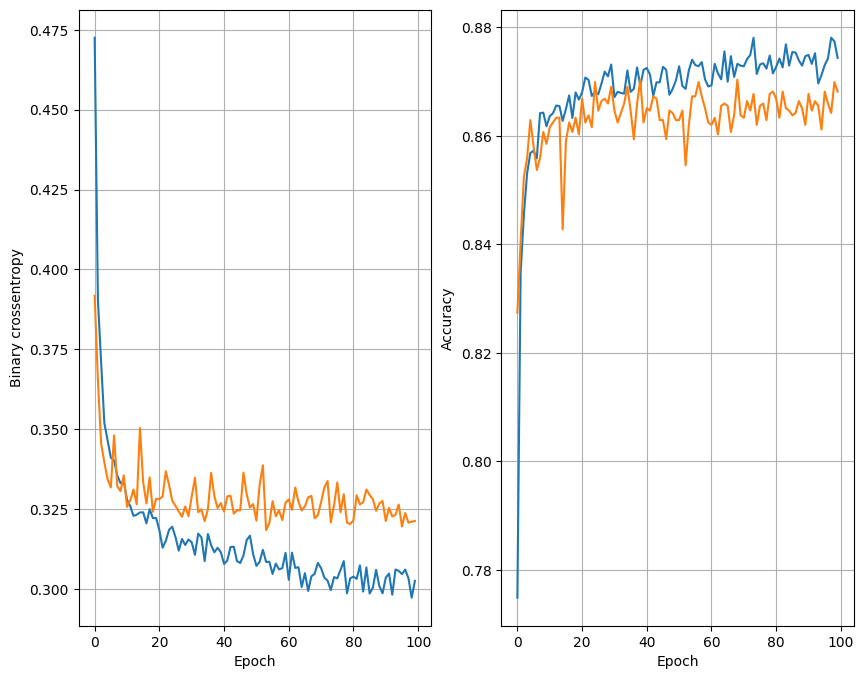

Validation Loss: 0.3184033930301666
Updated least loss model.
32 nodes, dropout 0.2, lr 0.005, batch size 32


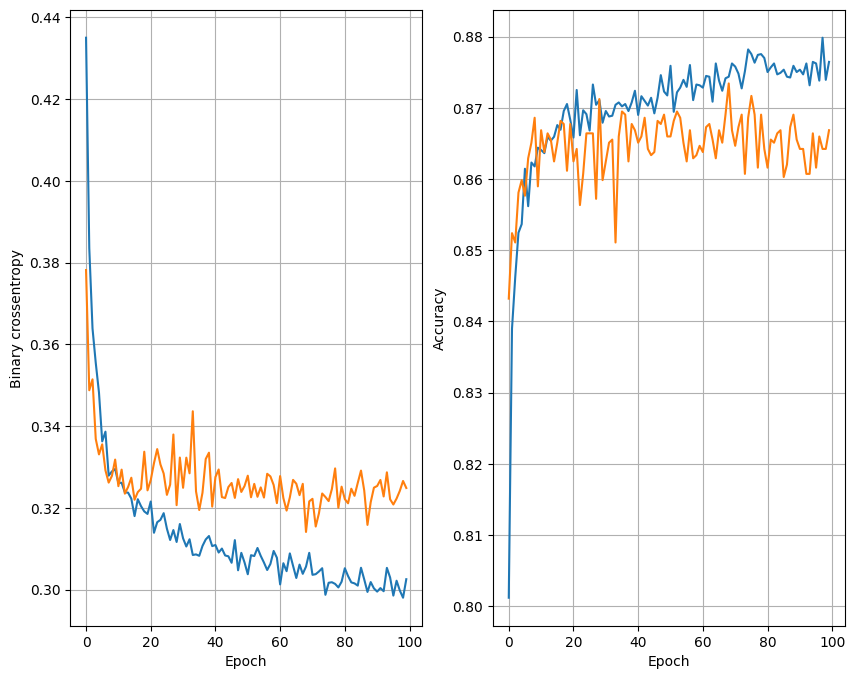

Validation Loss: 0.31904590129852295
32 nodes, dropout 0.2, lr 0.005, batch size 64


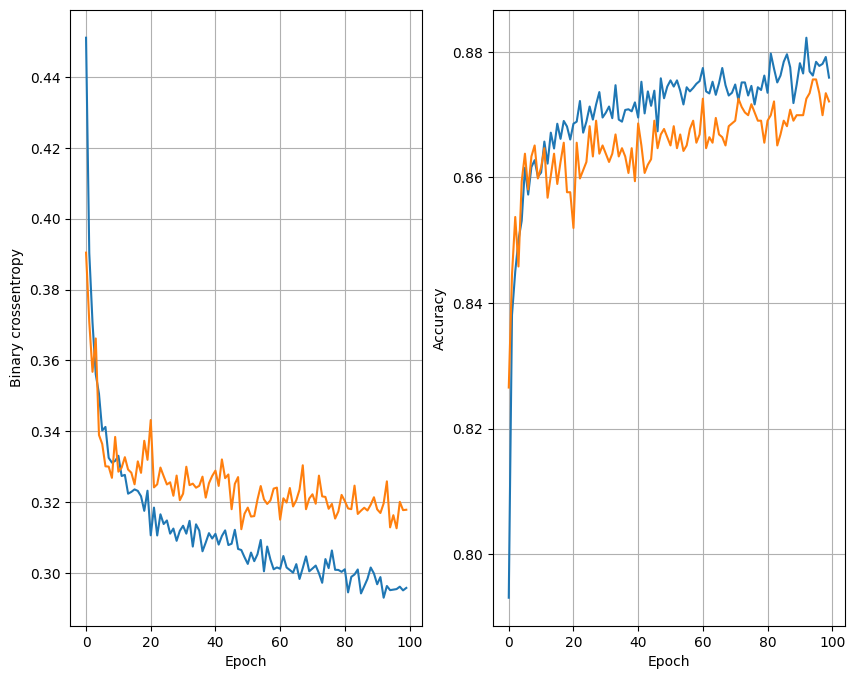

Validation Loss: 0.312207967042923
Updated least loss model.
32 nodes, dropout 0.2, lr 0.005, batch size 128


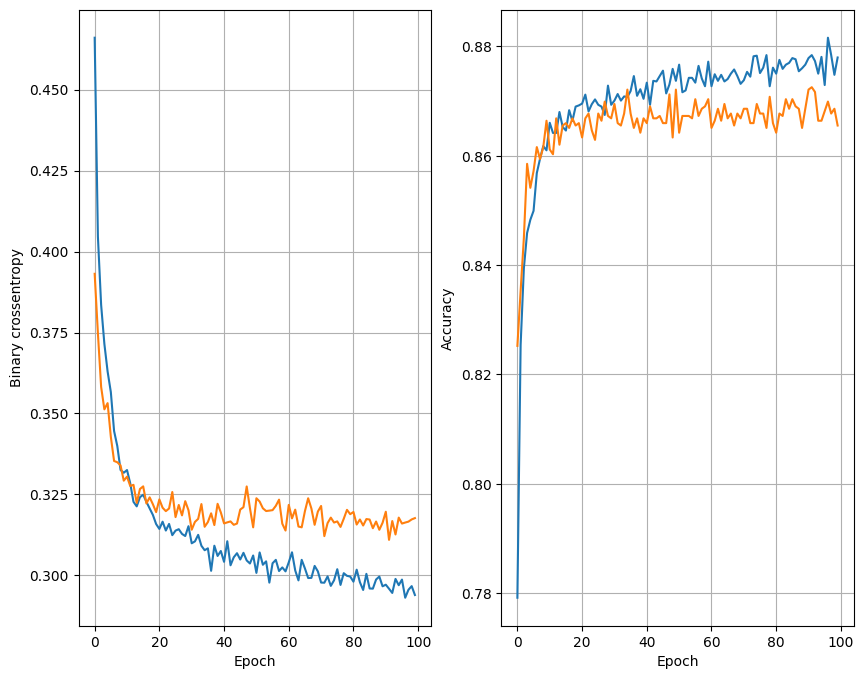

Validation Loss: 0.31396958231925964
32 nodes, dropout 0.2, lr 0.001, batch size 32


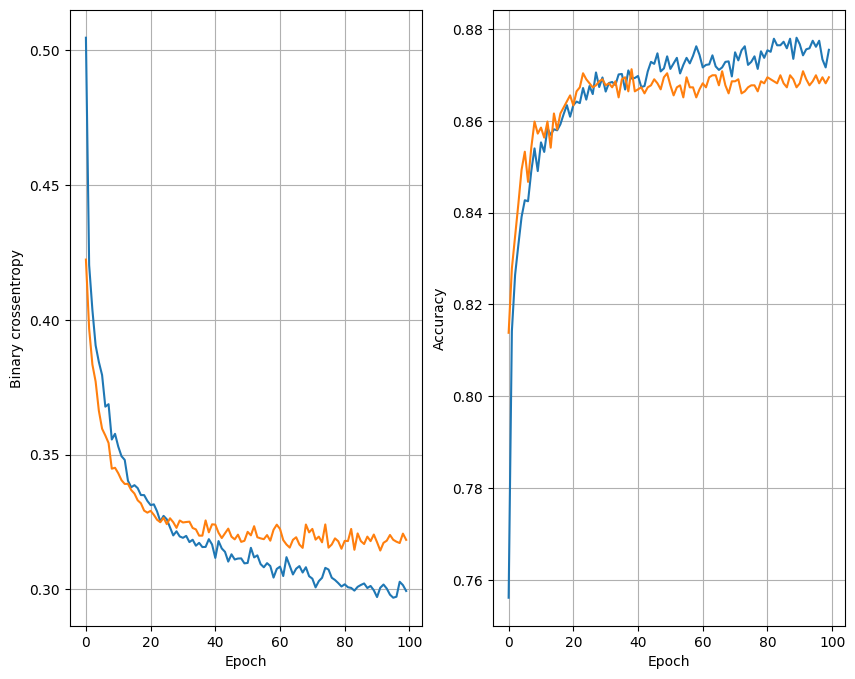

Validation Loss: 0.31446167826652527
32 nodes, dropout 0.2, lr 0.001, batch size 64


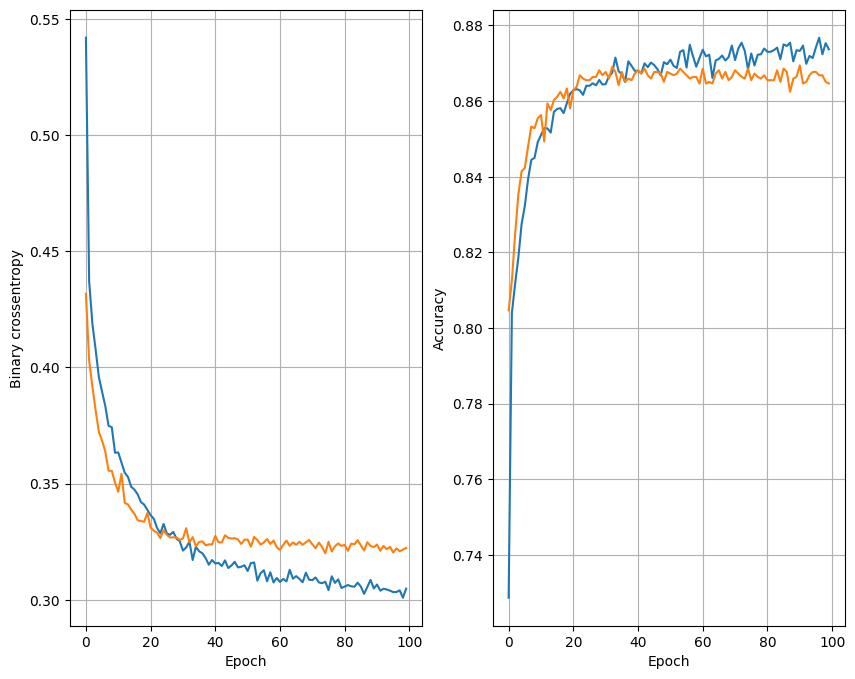

Validation Loss: 0.31737685203552246
32 nodes, dropout 0.2, lr 0.001, batch size 128


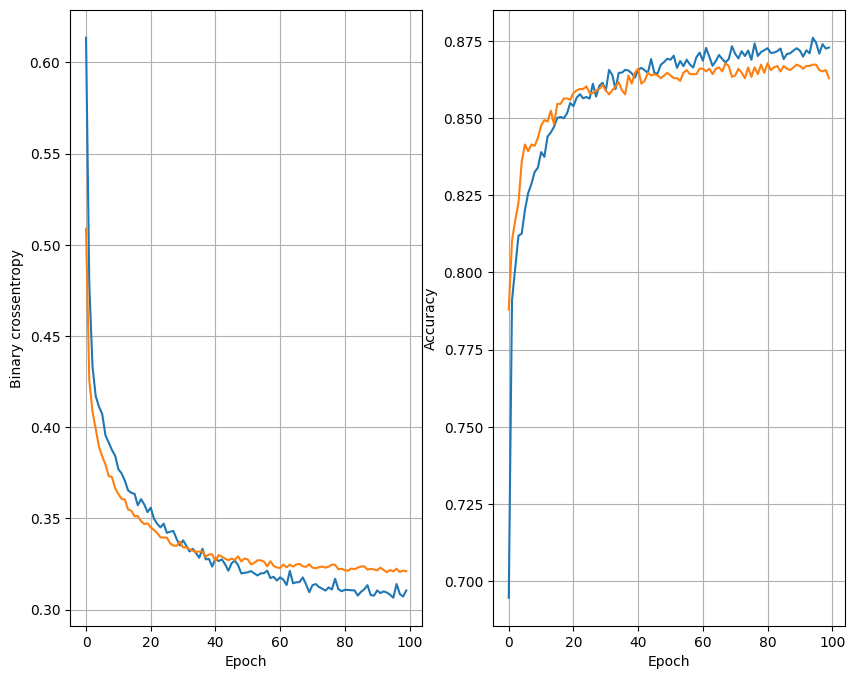

Validation Loss: 0.3203669786453247
64 nodes, dropout 0, lr 0.01, batch size 32


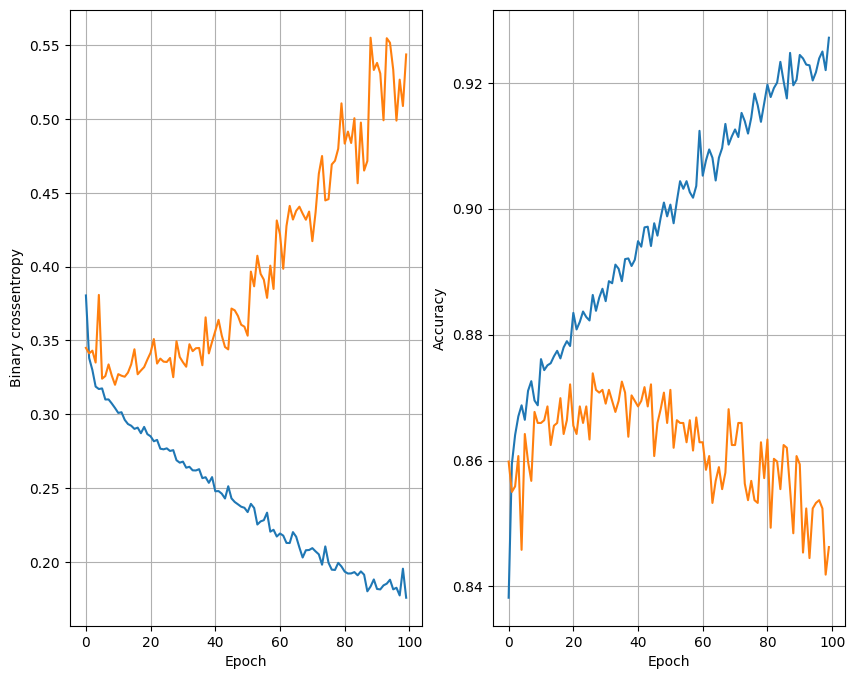

Validation Loss: 0.5077145099639893
64 nodes, dropout 0, lr 0.01, batch size 64


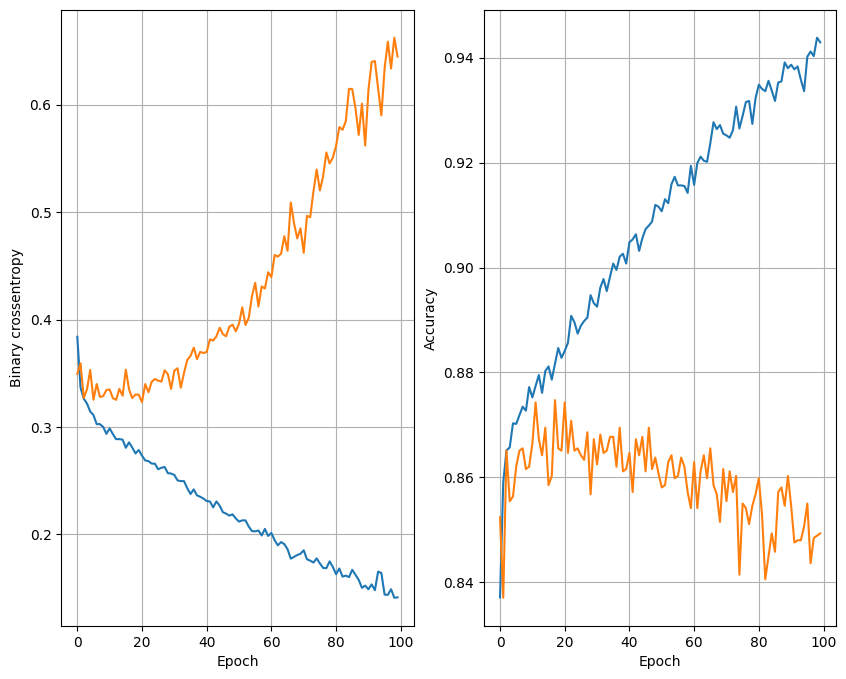

Validation Loss: 0.5827521085739136
64 nodes, dropout 0, lr 0.01, batch size 128


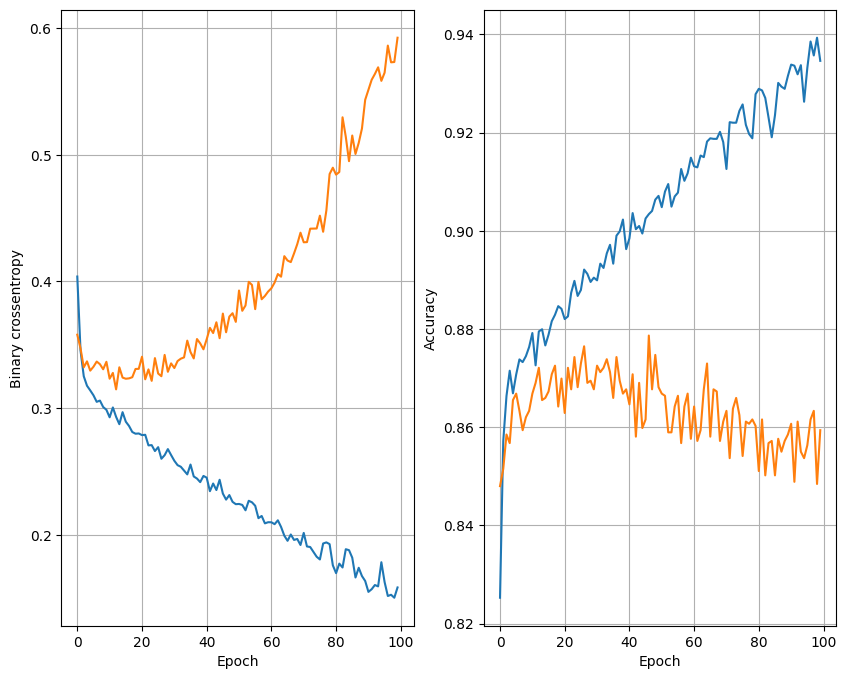

Validation Loss: 0.5410440564155579
64 nodes, dropout 0, lr 0.005, batch size 32


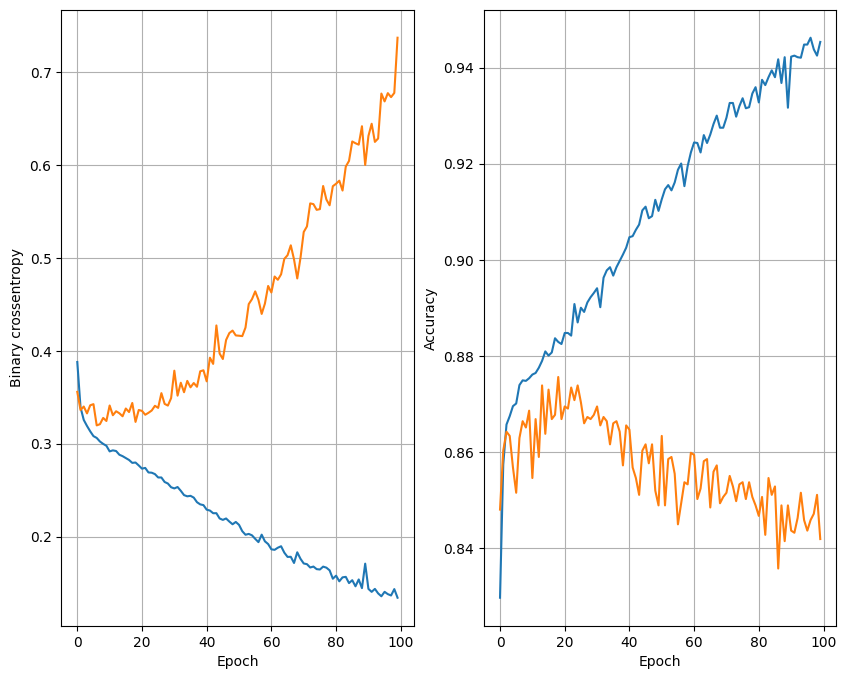

Validation Loss: 0.6197901368141174
64 nodes, dropout 0, lr 0.005, batch size 64


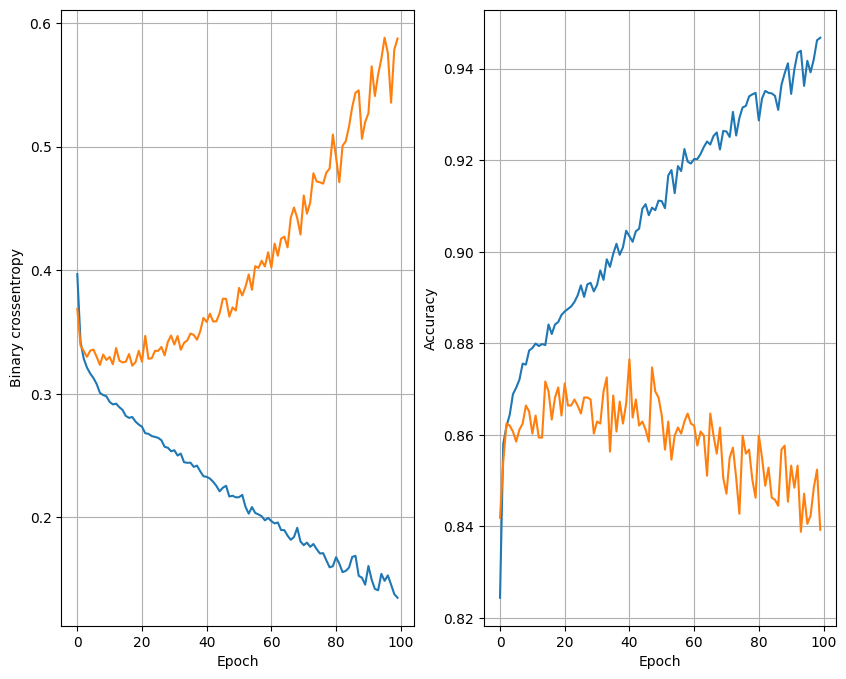

Validation Loss: 0.5451656579971313
64 nodes, dropout 0, lr 0.005, batch size 128


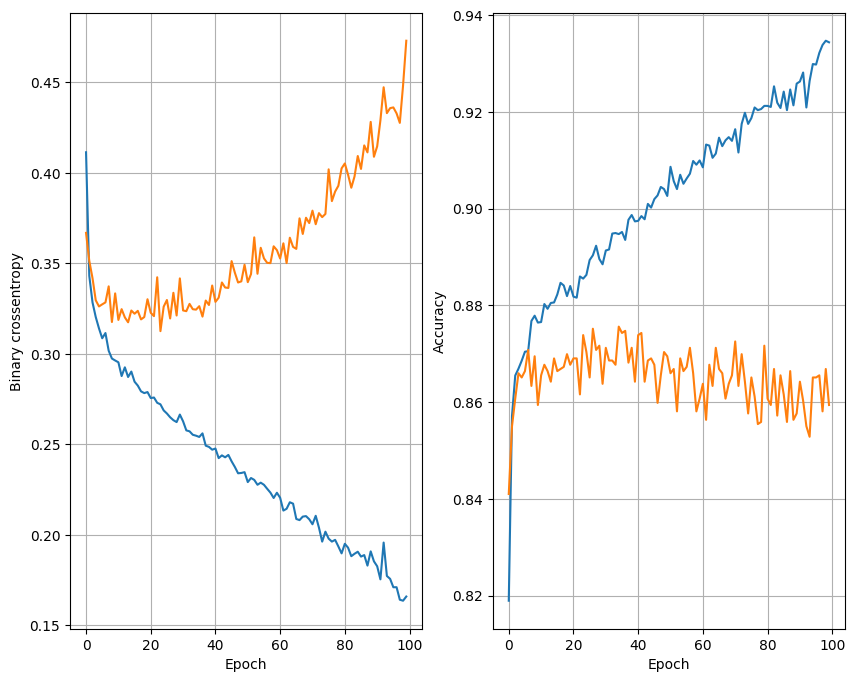

Validation Loss: 0.4414725601673126
64 nodes, dropout 0, lr 0.001, batch size 32


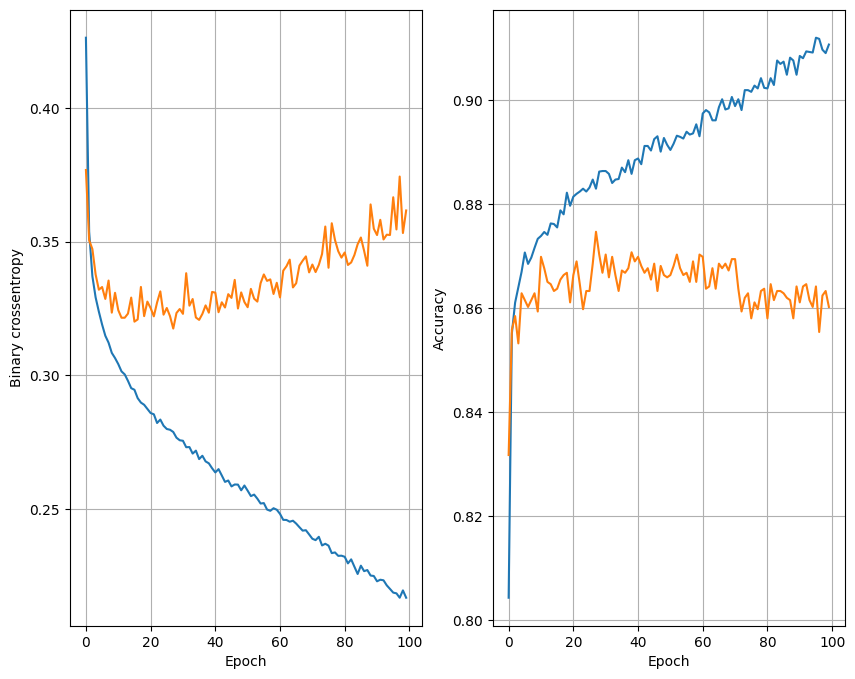

Validation Loss: 0.3365210294723511
64 nodes, dropout 0, lr 0.001, batch size 64


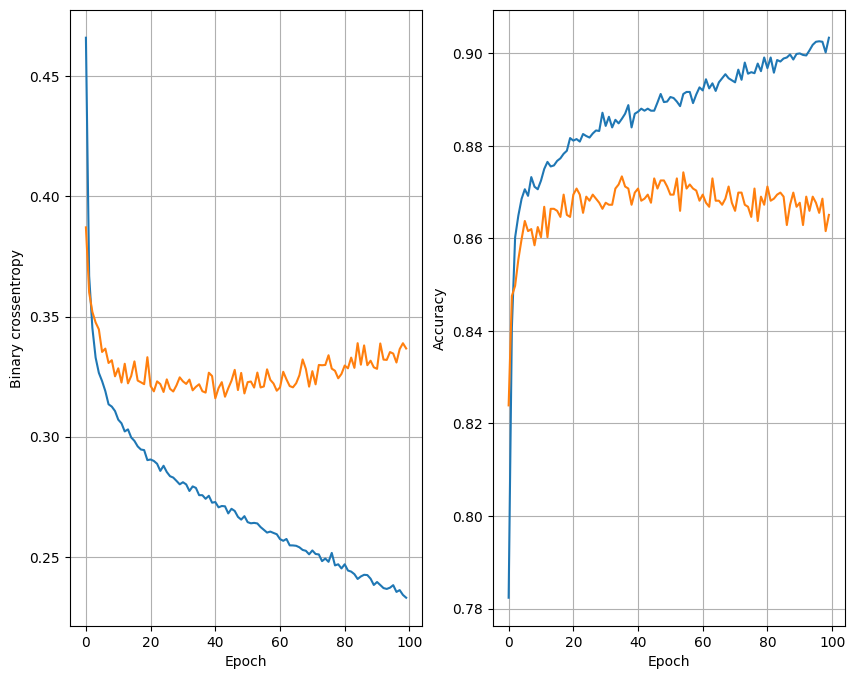

Validation Loss: 0.3318902850151062
64 nodes, dropout 0, lr 0.001, batch size 128


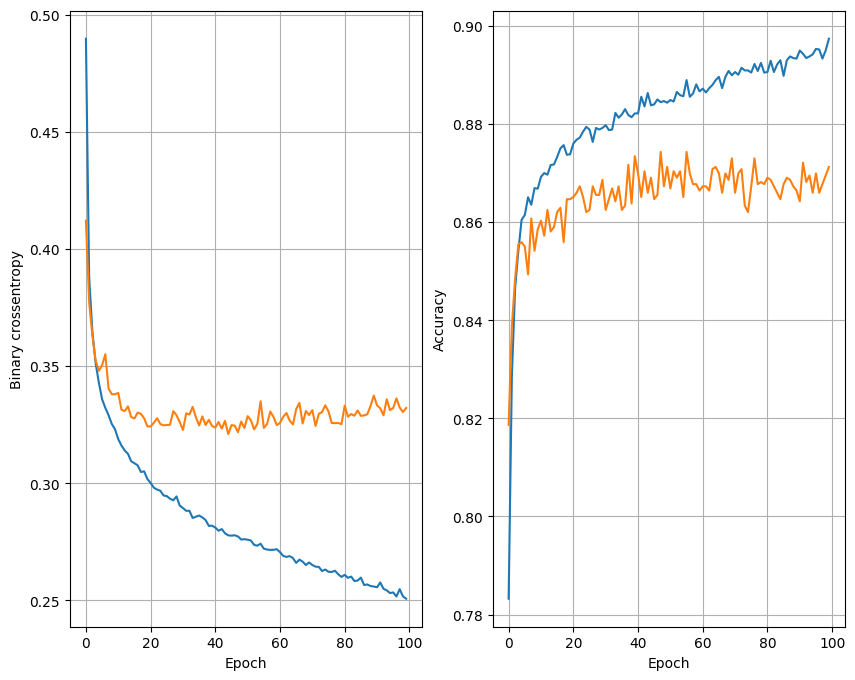

Validation Loss: 0.3363218307495117
64 nodes, dropout 0.2, lr 0.01, batch size 32


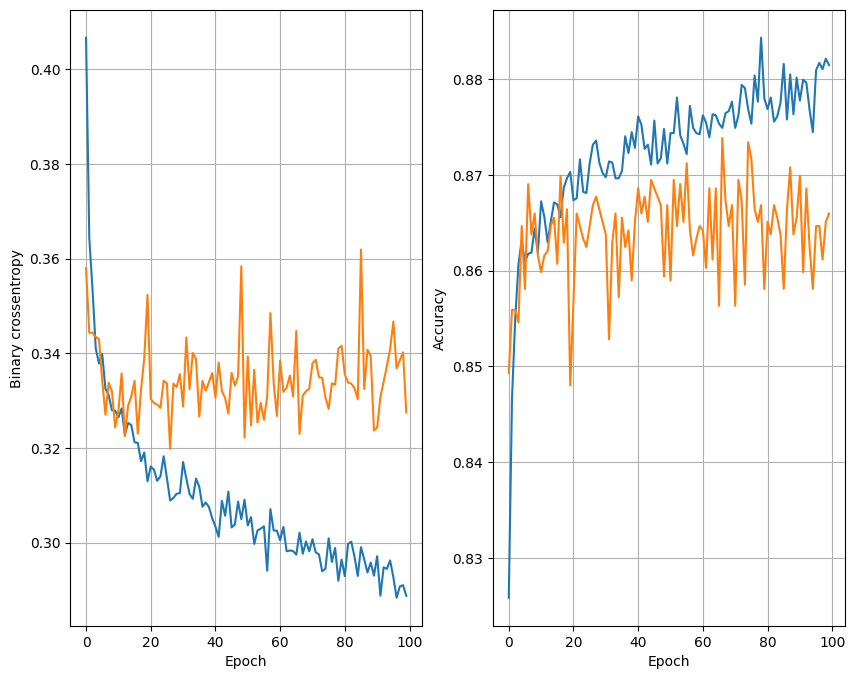

Validation Loss: 0.32260677218437195
64 nodes, dropout 0.2, lr 0.01, batch size 64


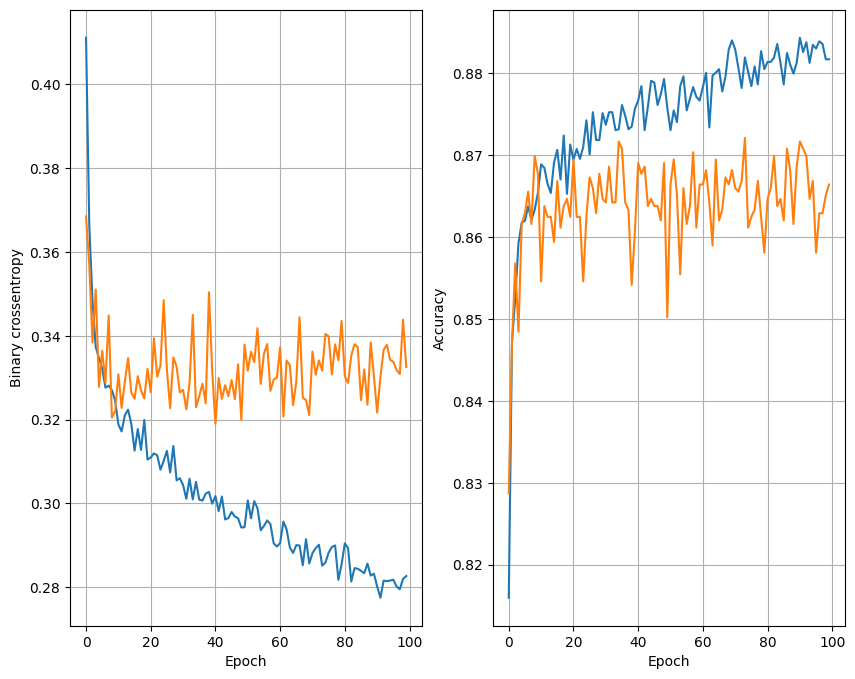

Validation Loss: 0.3192586898803711
64 nodes, dropout 0.2, lr 0.01, batch size 128


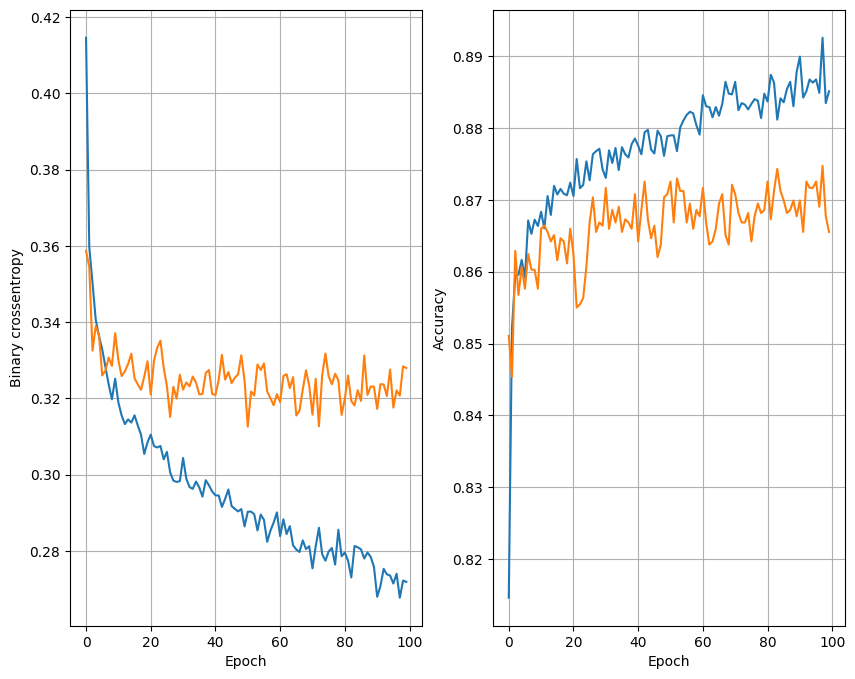

Validation Loss: 0.3175124228000641
64 nodes, dropout 0.2, lr 0.005, batch size 32


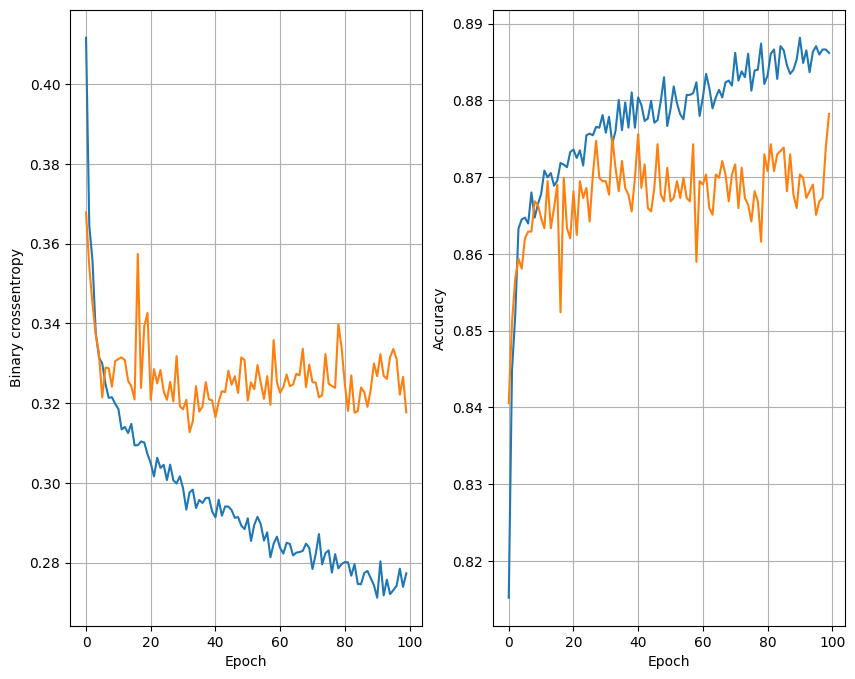

Validation Loss: 0.31147345900535583
Updated least loss model.
64 nodes, dropout 0.2, lr 0.005, batch size 64


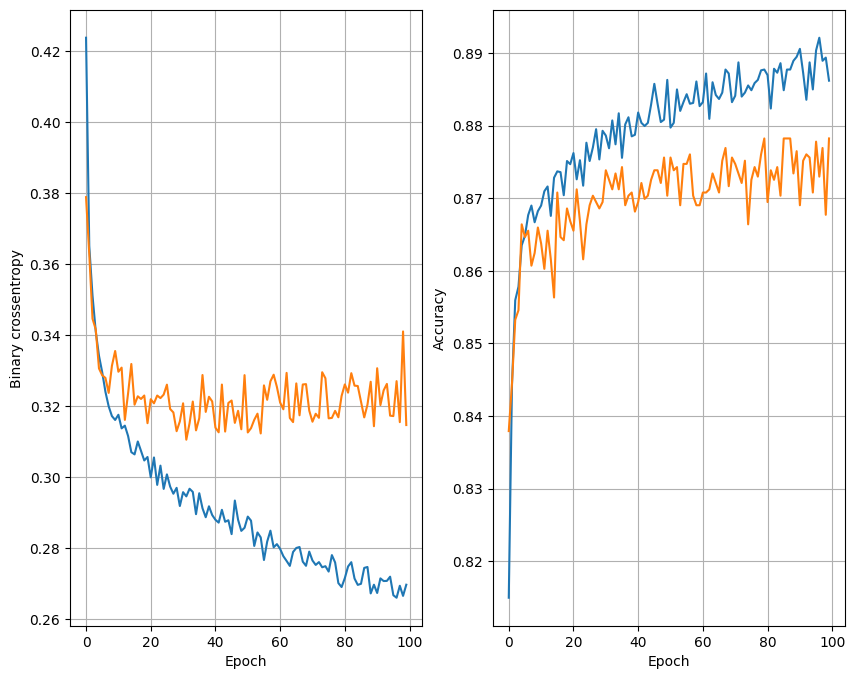

Validation Loss: 0.3084525167942047
Updated least loss model.
64 nodes, dropout 0.2, lr 0.005, batch size 128


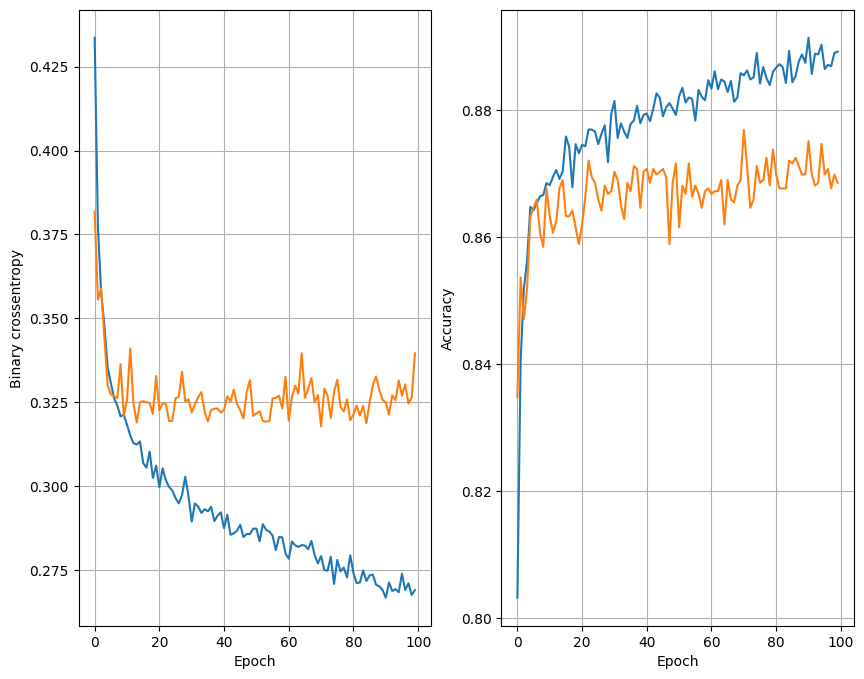

Validation Loss: 0.3196418881416321
64 nodes, dropout 0.2, lr 0.001, batch size 32


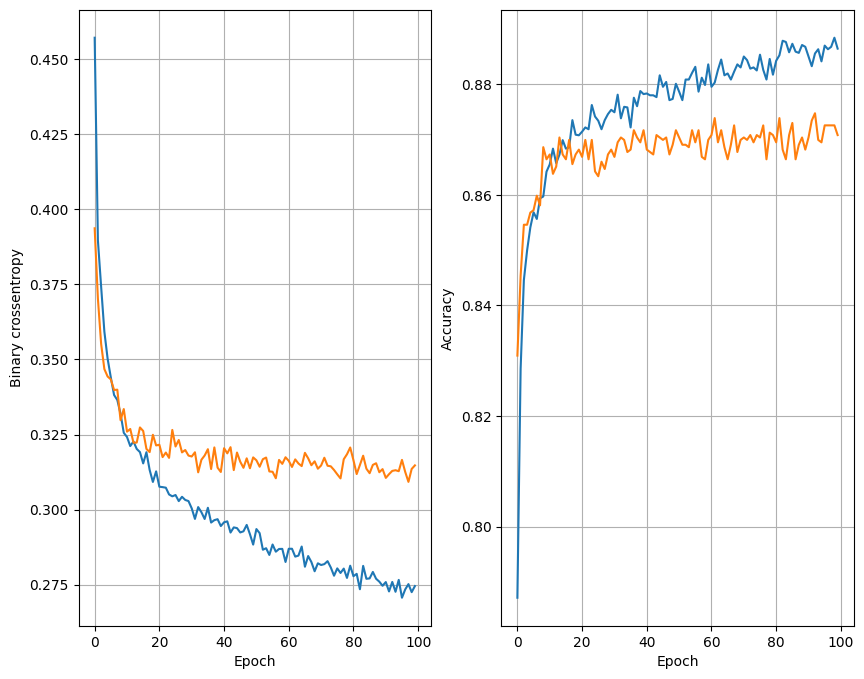

Validation Loss: 0.313507616519928
64 nodes, dropout 0.2, lr 0.001, batch size 64


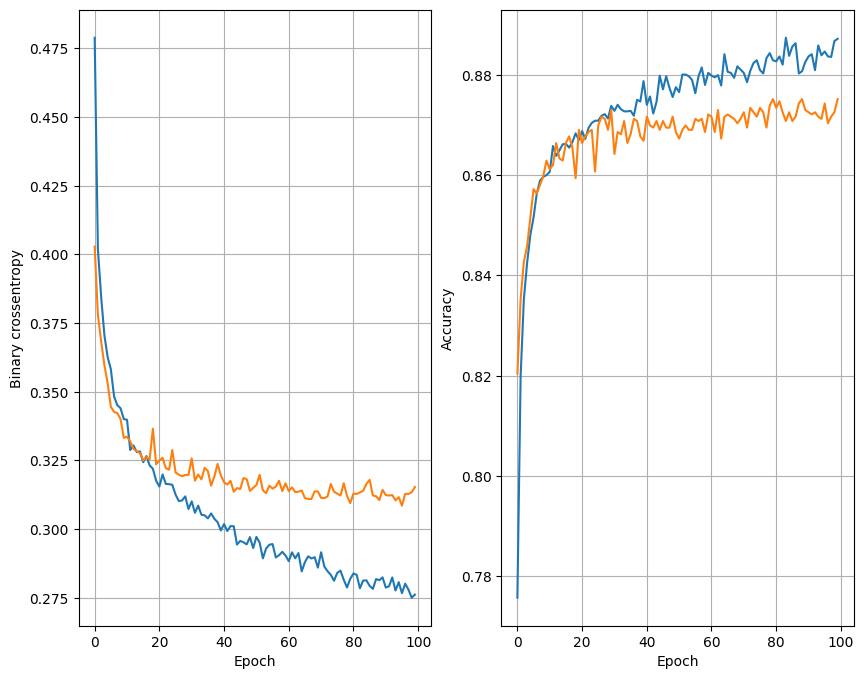

Validation Loss: 0.3108730912208557
64 nodes, dropout 0.2, lr 0.001, batch size 128


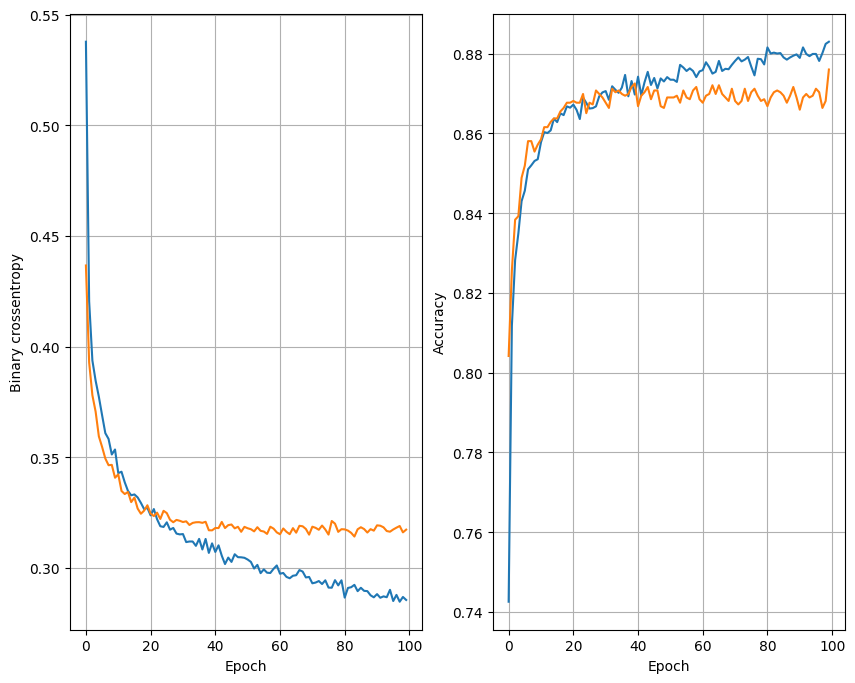

Validation Loss: 0.3105212152004242
Best model has validation loss: 0.3084525167942047


In [111]:
# least_val_loss=float('inf')
# least_loss_model=None
# epochs=100
# for num_nodes in[16,32,64]:
#   for dropout_prob in[0,0.2]:
#     for lr in[0.01,0.005,0.001]:
#       for batch_size in[32,64,128]:
#         print(f"{num_nodes}nodes,dropout{dropout_prob},lr{lr},batch size{batch_size}")
#         model,history=train_model(x_train,y_train,num_nodes,dropout_prob,lr,batch_size,epochs)
#         plot_history(history)
#         val_loss=model.evaluate(x_valid,y_valid)
least_val_loss = float('inf')  # Initialize the least validation loss
least_loss_model = None  # Initialize the best model
epochs = 100

for num_nodes in [16, 32, 64]:
    for dropout_prob in [0, 0.2]:
        for lr in [0.01, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")

                # Train the model with the current hyperparameters
                model, history = train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)

                # Plot the training history
                plot_history(history)

                # Evaluate on validation data
                val_loss = model.evaluate(x_valid, y_valid, verbose=0)

                # If val_loss is a list, take the first element (which is usually the loss)
                val_loss = val_loss[0] if isinstance(val_loss, list) else val_loss

                print(f"Validation Loss: {val_loss}")

                # Check if this is the best model
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_loss_model = model  # Save the model with the least validation loss
                    print("Updated least loss model.")

# Final Check
if least_loss_model is None:
    print("No model was trained successfully.")
else:
    print(f"Best model has validation loss: {least_val_loss}")



In [98]:
# Debug least_loss_model
y_pred = least_loss_model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)



119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [99]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.74      0.82      1350
           1       0.87      0.96      0.91      2454

    accuracy                           0.88      3804
   macro avg       0.89      0.85      0.86      3804
weighted avg       0.88      0.88      0.88      3804

